In [1]:
import fitz  # PyMuPDF
import os
import pandas as pd
from tqdm import tqdm

In [ ]:
def extract_title_and_abstract_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        text = ""
        for page in doc:
            text += page.get_text()
        doc.close()

        lines = text.split("\n")
        lines = [line.strip() for line in lines if line.strip() != ""]

        title = lines[0] if lines else ""

        abstract = ""
        for i, line in enumerate(lines):
            if "abstract" in line.lower():
                abstract_lines = lines[i+1:i+6]
                abstract = " ".join(abstract_lines)
                break

        return title, abstract

    except Exception as e:
        print(f"Errore durante la lettura di {pdf_path}: {e}")
        return None, None

def scan_papers_in_folder(folder_path):
    data = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".pdf"):
            full_path = os.path.join(folder_path, filename)
            title, abstract = extract_title_and_abstract_from_pdf(full_path)
            if title and abstract:
                data.append({
                    "filename": filename,
                    "title": title,
                    "abstract": abstract
                })

    df = pd.DataFrame(data)
    return df

# Imposta il path alla tua cartella di PDF
folder_path = "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged"

# Esegui lo scan
df_papers = scan_papers_in_folder(folder_path)

# Visualizza i risultati
print(df_papers.head())

# Salva in un file CSV (opzionale)
df_papers.to_csv("/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/index.csv", index=False)


 17%|█▋        | 22/126 [00:01<00:07, 14.66it/s]

Errore durante la lettura di /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/18_Computer aided robotics for applications in fracture reduction surgery advances, challenges and opportunities.pdf: Cannot open empty file: filename='/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/18_Computer aided robotics for applications in fracture reduction surgery advances, challenges and opportunities.pdf'.


 97%|█████████▋| 122/126 [00:12<00:00, 11.27it/s]

Errore durante la lettura di /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/48_Metaverse-based simulation  a scoping review of charting medical education over the last two decades in the lens of the  marvelous medical education m.pdf: Cannot open empty file: filename='/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/48_Metaverse-based simulation  a scoping review of charting medical education over the last two decades in the lens of the  marvelous medical education m.pdf'.


100%|██████████| 126/126 [00:12<00:00, 10.17it/s]

                                            filename  \
0  53_Symbiotic relationship between robotics and...   
1  60_What is a digital twin experimental design ...   
2  2_A deep learning approach to estimate x‐ray s...   
3  22_Digital twin current scenario and a case st...   
4  54_Revolutionizing Healthcare A Review Unveili...   

                                               title  \
0                     Symbiotic relationship between   
1                                             
2                          Received: 8 February 2023   
3                                   ORIGINAL ARTICLE   
4  Received 20 March 2024, accepted 3 May 2024, d...   

                                            abstract  
0  Purpose – The present paper aims to demonstrat...  
1  been used predominantly for problems in engine...  
2  Background: Digital breast tomosynthesis (DBT)...  
3  In the current scenario, industries need to ha...  
4  transformative force, holding the promise of r... 

In [3]:
import fitz  # PyMuPDF
import os
import pandas as pd
from tqdm import tqdm

def extract_abstract_from_pdf(pdf_path):
    try:
        doc = fitz.open(pdf_path)
        full_text = ""
        for page in doc:
            full_text += page.get_text()
        doc.close()

        lines = full_text.split('\n')
        lines = [line.strip() for line in lines if line.strip()]

        abstract = ""
        is_abstract = False

        for line in lines:
            # Cerca inizio abstract
            if "abstract" in line.lower():
                is_abstract = True
                continue

            # Se parte abstract e si incontra "1." (es. "1. Introduction") si interrompe
            if is_abstract and (line.lower().startswith("1.") or line.lower().startswith("keywords")):
                break

            if is_abstract:
                abstract += " " + line.strip()

        return abstract.strip()

    except Exception as e:
        print(f"Errore con {pdf_path}: {e}")
        return None

def process_pdf_folder(folder_path):
    papers = []

    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            title_from_filename = filename.replace(".pdf", "")
            abstract = extract_abstract_from_pdf(file_path)
            if abstract:
                papers.append({
                    "title": title_from_filename,
                    "abstract": abstract
                })

    df = pd.DataFrame(papers)
    return df

# ESEMPIO: cambia questo con il path dove hai i tuoi PDF
pdf_folder = "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged"
df_papers = process_pdf_folder(pdf_folder)

# Visualizza e salva
print(df_papers.head())
df_papers.to_csv("/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/index1.csv", index=False)


 17%|█▋        | 22/126 [00:01<00:07, 14.54it/s]

Errore con /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/18_Computer aided robotics for applications in fracture reduction surgery advances, challenges and opportunities.pdf: Cannot open empty file: filename='/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/18_Computer aided robotics for applications in fracture reduction surgery advances, challenges and opportunities.pdf'.


 97%|█████████▋| 122/126 [00:12<00:00, 11.15it/s]

Errore con /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/48_Metaverse-based simulation  a scoping review of charting medical education over the last two decades in the lens of the  marvelous medical education m.pdf: Cannot open empty file: filename='/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/merged/48_Metaverse-based simulation  a scoping review of charting medical education over the last two decades in the lens of the  marvelous medical education m.pdf'.


100%|██████████| 126/126 [00:12<00:00, 10.13it/s]


                                               title  \
0  53_Symbiotic relationship between robotics and...   
1  60_What is a digital twin experimental design ...   
2  2_A deep learning approach to estimate x‐ray s...   
3  22_Digital twin current scenario and a case st...   
4  54_Revolutionizing Healthcare A Review Unveili...   

                                            abstract  
0  Purpose – The present paper aims to demonstrat...  
1  been used predominantly for problems in engine...  
2  Background: Digital breast tomosynthesis (DBT)...  
3  In the current scenario, industries need to ha...  
4  transformative force, holding the promise of r...  


### Now we start with the first query filtering ; 
- block1 = ["digital twin", "virtual twin"]
- block2 = ["healthcare", "medical", "clinical", "hospital"]
- block3 = ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease"]
- block4 = ["decision-making", "clinical decision", "diagnos", "treatment planning", "patient management"]

**as**

```("digital twin*" OR "virtual twin*")  
AND  
("healthcare" OR "medical" OR "clinical" OR "hospital")  
AND  
("surg*" OR "radiolog*" OR "oncol*" OR "cardiol*" OR "neurol*" OR "chronic disease*")  
AND  
("decision-making" OR "clinical decision*" OR "diagnos*" OR "treatment planning" OR "patient management")```

In [10]:
import re

# Step 1 - gruppi di keyword
block1 = ["digital twin", "virtual twin"]
block2 = ["healthcare", "medical", "clinical", "hospital"]
block3 = ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease"]
block4 = ["decision-making", "clinical decision", "diagnos", "treatment planning", "patient management"]

# Step 2 - funzione per match (wildcard con in operator)
def matches_keywords(text, keywords):
    return any(kw in text for kw in keywords)

# Step 3 - funzione per filtrare il DataFrame 
def filter_relevant_papers(df):
    filtered_papers = []

    for _, row in df.iterrows():
        title = row["title"].lower()
        # Puoi anche aggiungere abstract con: title + " " + row["abstract"].lower()

        if (matches_keywords(title, block1) and
            matches_keywords(title, block2) and
            matches_keywords(title, block3) and
            matches_keywords(title, block4)):
            filtered_papers.append(row)

    return pd.DataFrame(filtered_papers)


In [11]:
# Assumendo che tu abbia già df_papers da prima
df_filtered = filter_relevant_papers(df_papers)

print(f"🔍 Paper trovati: {len(df_filtered)}")
df_filtered.to_csv("/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/filtered.csv", index=False)


🔍 Paper trovati: 0


### no match for title , so below we try matching with same query but on abstract ;; 

In [12]:
# Keywords divise in blocchi logici
block1 = ["digital twin", "virtual twin"]
block2 = ["healthcare", "medical", "clinical", "hospital"]
block3 = ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease"]
block4 = ["decision-making", "clinical decision", "diagnos", "treatment planning", "patient management"]

# Funzione per verificare se almeno una keyword è contenuta nel testo
def matches_keywords(text, keywords):
    return any(kw in text for kw in keywords)

# Funzione per filtrare i paper in base agli abstract
def filter_relevant_papers(df):
    filtered_papers = []

    for _, row in df.iterrows():
        full_text = (row["abstract"] or "").lower()

        if (matches_keywords(full_text, block1) and
            matches_keywords(full_text, block2) and
            matches_keywords(full_text, block3) and
            matches_keywords(full_text, block4)):
            filtered_papers.append(row)

    return pd.DataFrame(filtered_papers)


In [14]:
df_filtered = filter_relevant_papers(df_papers)

print(f"📌 Paper selezionati (su abstract): {len(df_filtered)}")
df_filtered.to_csv("/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/abstract_parsing .csv", index=False)


📌 Paper selezionati (su abstract): 17


#### Now just change query for filtering , :
**as this**

``` ("digital twin*" OR "virtual twin*" OR "computational patient model*" OR "patient-specific simulation")
AND
("healthcare" OR "medical" OR "clinical" OR "medicine" OR "hospital")
AND
("surg*" OR "radiolog*" OR "oncol*" OR "cardiol*" OR "neurol*" OR "chronic disease*" OR "intensive care" OR "critical care" OR "therap*")
AND
("decision-making" OR "decision support" OR "clinical decision*" OR "diagnos*" OR "treatment planning" OR "patient management" OR "predictive model*" OR "outcome prediction") ```

In [15]:
# Tutti i filtri separati per blocchi logici, con wildcard gestita via "startswith"

queries = [
    {
        "label": "Query_1",
        "blocks": [
            ["digital twin", "virtual twin", "computational patient model", "patient-specific simulation"],
            ["healthcare", "medical", "clinical", "medicine", "hospital"],
            ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease", "intensive care", "critical care", "therap"],
            ["decision-making", "decision support", "clinical decision", "diagnos", "treatment planning", "patient management", "predictive model", "outcome prediction"]
        ]
    },
    {
        "label": "Query_2",
        "blocks": [
            ["digital twin", "virtual twin"],
            ["healthcare", "medical", "clinical"],
            ["application", "use case", "implementation"]
        ]
    },
    {
        "label": "Query_3",
        "blocks": [
            ["digital twin healthcare"],
            ["virtual patient model clinical decision"],
            ["medical digital twin treatment planning"]
        ],
        "phrase_mode": True  # per cercare espressioni complete
    }
]

# Funzione di supporto
def matches_keywords_block(text, block):
    return any(kw in text for kw in block)

def matches_phrase_exact(text, phrase):
    return phrase in text

# Funzione per filtrare un DataFrame con le query strutturate
def filter_papers_by_queries(df, queries):
    df = df.copy()
    df["full_text"] = (df["title"].fillna("") + " " + df["abstract"].fillna("")).str.lower()
    
    results = {}

    for query in queries:
        matched = []

        for _, row in df.iterrows():
            text = row["full_text"]

            if query.get("phrase_mode", False):
                # Frasi complete (Query 3)
                if any(matches_phrase_exact(text, phrase) for phrase in query["blocks"][0]):
                    matched.append(row)
            else:
                # Blocchi logici (Query 1 & 2)
                if all(matches_keywords_block(text, block) for block in query["blocks"]):
                    matched.append(row)
        
        results[query["label"]] = pd.DataFrame(matched)
    
    return results


In [ ]:
import pandas as pd
import os

# ------------------- STEP 1: Define the queries used for filtering -------------------
# Three structured keyword-based queries were designed for title and abstract matching.
queries = [
    {
        "label": "Query_1",
        "description": "Primary query combining digital twin concepts in healthcare and clinical decision-making.",
        "blocks": [
            ["digital twin", "virtual twin", "computational patient model", "patient-specific simulation"],
            ["healthcare", "medical", "clinical", "medicine", "hospital"],
            ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease", "intensive care", "critical care", "therap"],
            ["decision-making", "decision support", "clinical decision", "diagnos", "treatment planning", "patient management", "predictive model", "outcome prediction"]
        ]
    },
    {
        "label": "Query_2",
        "description": "Query for general use of digital twin technologies in healthcare applications.",
        "blocks": [
            ["digital twin", "virtual twin"],
            ["healthcare", "medical", "clinical"],
            ["application", "use case", "implementation"]
        ]
    },
    {
        "label": "Query_3",
        "description": "Phrase-based query to match complete thematic expressions.",
        "blocks": [
            ["digital twin healthcare"],
            ["virtual patient model clinical decision"],
            ["medical digital twin treatment planning"]
        ],
        "phrase_mode": True
    }
]

# ------------------- STEP 2: Define filtering functions -------------------
def matches_keywords_block(text, block):
    """Check if any keyword from a block appears in the text."""
    return any(kw in text for kw in block)

def matches_phrase_exact(text, phrase):
    """Check if a specific phrase appears in the text."""
    return phrase in text

def filter_papers_by_queries(df, queries):
    """Apply each query to the dataset and return matching entries."""
    df = df.copy()  
    df["full_text"] = (df["title"].fillna("") + " " + df["abstract"].fillna("")).str.lower()
    
    results = {}

    for query in queries:
        matched_rows = []

        for _, row in df.iterrows():
            text = row["full_text"]

            if query.get("phrase_mode", False):
                # Phrase-based query (exact match)
                if any(matches_phrase_exact(text, phrase) for phrase in query["blocks"][0]):
                    matched_rows.append(row)
            else:
                # Block-wise boolean AND query
                if all(matches_keywords_block(text, block) for block in query["blocks"]):
                    matched_rows.append(row)

        results[query["label"]] = pd.DataFrame(matched_rows)
        print(f"🔎 {query['label']}: {len(matched_rows)} papers matched | {query['description']}")
    
    return results

# ------------------- STEP 3: Run filtering over the DataFrame -------------------
# Assumes df_papers is preloaded with 'title' and 'abstract' columns.
filtered_results = filter_papers_by_queries(df_papers, queries)

# ------------------- STEP 4: Save filtered results to local files -------------------
# You can customize these paths to fit your machine or project folder structure.
output_paths = {
    "Query_1": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered1.csv",
    "Query_2": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered2.csv",
    "Query_3": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered3.csv"
}

# Ensure all output directories exist
for path in output_paths.values():
    os.makedirs(os.path.dirname(path), exist_ok=True)

# Save matched papers to their respective output files
for label, df_result in filtered_results.items():
    output_path = output_paths[label]
    df_result.to_csv(output_path, index=False)
    print(f"✅ Results saved for {label}: {len(df_result)} papers → {output_path}")


In [ ]:
filtered = filter_papers_by_queries(df_papers, queries)

# Salva ogni filtro in un CSV
for label, df_result in filtered.items():
    print(f"{label}: {len(df_result)} risultati")
    df_result.to_csv(f"{label}_filtered.csv", index=False)


In [24]:
import pandas as pd
import os

# ------------------- Step 1: Define queries -------------------
queries = [
    {
        "label": "Query_1",
        "blocks": [
            ["digital twin", "virtual twin", "computational patient model", "patient-specific simulation"],
            ["healthcare", "medical", "clinical", "medicine", "hospital"],
            ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease", "intensive care", "critical care", "therap"],
            ["decision-making", "decision support", "clinical decision", "diagnos", "treatment planning", "patient management", "predictive model", "outcome prediction"]
        ]
    },
    {
        "label": "Query_2",
        "blocks": [
            ["digital twin", "virtual twin"],
            ["healthcare", "medical", "clinical"],
            ["application", "use case", "implementation"]
        ]
    },
    {
        "label": "Query_3",
        "blocks": [
            ["digital twin healthcare"],
            ["virtual patient model clinical decision"],
            ["medical digital twin treatment planning"]
        ],
        "phrase_mode": True
    }
]

# ------------------- Step 2: Define matching functions -------------------
def matches_keywords_block(text, block):
    return any(kw in text for kw in block)

def matches_phrase_exact(text, phrase):
    return phrase in text

def filter_papers_by_queries(df, queries):
    df = df.copy()
    df["full_text"] = (df["title"].fillna("") + " " + df["abstract"].fillna("")).str.lower()
    
    results = {}

    for query in queries:
        matched = []

        for _, row in df.iterrows():
            text = row["full_text"]

            if query.get("phrase_mode", False):
                if any(matches_phrase_exact(text, phrase) for phrase in query["blocks"][0]):
                    matched.append(row)
            else:
                if all(matches_keywords_block(text, block) for block in query["blocks"]):
                    matched.append(row)
        
        results[query["label"]] = pd.DataFrame(matched)
    
    return results

# ------------------- Step 3: Run filtering -------------------
filtered_results = filter_papers_by_queries(df_papers, queries)

# ------------------- Step 4: Define output paths -------------------
output_paths = {
    "Query_1": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered1.csv",
    "Query_2": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered2.csv",
    "Query_3": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered3.csv"
}

# Create directories if they don't exist
for path in output_paths.values():
    os.makedirs(os.path.dirname(path), exist_ok=True)

# ------------------- Step 5: Save filtered results -------------------
for label, df_result in filtered_results.items():
    output_path = output_paths[label]
    df_result.to_csv(output_path, index=False)
    print(f"✅ {label}: {len(df_result)} risultati salvati in\n➡️ {output_path}")


✅ Query_1: 20 risultati salvati in
➡️ /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered1.csv
✅ Query_2: 41 risultati salvati in
➡️ /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered2.csv
✅ Query_3: 1 risultati salvati in
➡️ /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered3.csv


In [ ]:
# ------------------- Step 1: Define queries -------------------

queries = [
    {
        "label": "Query_1",
        "blocks": [
            ["digital twin", "virtual twin", "computational patient model", "patient-specific simulation"],
            ["healthcare", "medical", "clinical", "medicine", "hospital"],
            ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease", "intensive care", "critical care", "therap"],
            ["decision-making", "decision support", "clinical decision", "diagnos", "treatment planning", "patient management", "predictive model", "outcome prediction"]
        ]
    },
    {
        "label": "Query_2",
        "blocks": [
            ["digital twin", "virtual twin"],
            ["healthcare", "medical", "clinical"],
            ["application", "use case", "implementation"]
        ]
    },
    {
        "label": "Query_3",
        "blocks": [
            ["digital twin healthcare"],
            ["virtual patient model clinical decision"],
            ["medical digital twin treatment planning"]
        ],
        "phrase_mode": True
    }
]

# ------------------- Step 2: Define matching functions -------------------

def matches_keywords_block(text, block):
    return any(kw in text for kw in block)

def matches_phrase_exact(text, phrase):
    return phrase in text

def filter_papers_by_queries(df, queries):
    df = df.copy()
    df["full_text"] = (df["title"].fillna("") + " " + df["abstract"].fillna("")).str.lower()
    
    results = {}

    for query in queries:
        matched = []

        for _, row in df.iterrows():
            text = row["full_text"]

            if query.get("phrase_mode", False):
                if any(matches_phrase_exact(text, phrase) for phrase in query["blocks"][0]):
                    matched.append(row)
            else:
                if all(matches_keywords_block(text, block) for block in query["blocks"]):
                    matched.append(row)
        
        results[query["label"]] = pd.DataFrame(matched)
    
    return results

# ------------------- Step 3: Run filtering and export to CSV -------------------

filtered_results = filter_papers_by_queries(df_papers, queries)

# Salvataggio dei file CSV
for label, df_result in filtered_results.items():
    print(f"🔎 {label}: {len(df_result)} paper trovati.")
    df_result.to_csv(f"{label}_filtered.csv", index=False)


In [1]:
import pandas as pd
import os

df_papers = pd.read_csv('/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/index1.csv')

# ------------------- STEP 1: Define the queries used for filtering -------------------
# Three structured keyword-based queries were designed for title and abstract matching.
queries = [
    {
        "label": "Query_1",
        "description": "Primary query combining digital twin concepts in healthcare and clinical decision-making.",
        "blocks": [
            ["digital twin", "virtual twin", "computational patient model", "patient-specific simulation"],
            ["healthcare", "medical", "clinical", "medicine", "hospital"],
            ["surg", "radiolog", "oncol", "cardiol", "neurol", "chronic disease", "intensive care", "critical care", "therap"],
            ["decision-making", "decision support", "clinical decision", "diagnos", "treatment planning", "patient management", "predictive model", "outcome prediction"]
        ]
    },
    {
        "label": "Query_2",
        "description": "Query for general use of digital twin technologies in healthcare applications.",
        "blocks": [
            ["digital twin", "virtual twin"],
            ["healthcare", "medical", "clinical"],
            ["application", "use case", "implementation"]
        ]
    },
    {
        "label": "Query_3",
        "description": "Phrase-based query to match complete thematic expressions.",
        "blocks": [
            ["digital twin healthcare"],
            ["virtual patient model clinical decision"],
            ["medical digital twin treatment planning"]
        ],
        "phrase_mode": True
    }
]

# ------------------- STEP 2: Define filtering functions -------------------
def matches_keywords_block(text, block):
    """Check if any keyword from a block appears in the text."""
    return any(kw in text for kw in block)

def matches_phrase_exact(text, phrase):
    """Check if a specific phrase appears in the text."""
    return phrase in text

def filter_papers_by_queries(df, queries):
    """Apply each query to the dataset and return matching entries."""
    df = df.copy()
    df["full_text"] = (df["title"].fillna("") + " " + df["abstract"].fillna("")).str.lower()
    
    results = {}

    for query in queries:
        matched_rows = []

        for _, row in df.iterrows():
            text = row["full_text"]

            if query.get("phrase_mode", False):
                # Phrase-based query (exact match)
                if any(matches_phrase_exact(text, phrase) for phrase in query["blocks"][0]):
                    matched_rows.append(row)
            else:
                # Block-wise boolean AND query
                if all(matches_keywords_block(text, block) for block in query["blocks"]):
                    matched_rows.append(row)

        results[query["label"]] = pd.DataFrame(matched_rows)
        print(f"🔎 {query['label']}: {len(matched_rows)} papers matched | {query['description']}")
    
    return results

# ------------------- STEP 3: Run filtering over the DataFrame -------------------
# Assumes df_papers is preloaded with 'title' and 'abstract' columns.

filtered_results = filter_papers_by_queries(df_papers, queries)

# ------------------- STEP 4: Save filtered results to local files -------------------
# You can customize these paths to fit your machine or project folder structure.
output_paths = {
    "Query_1": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/parsed/query1.csv",
    "Query_2": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/parsed/query2.csv",
    "Query_3": "/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/parsed/query3.csv"
}

# Ensure all output directories exist
for path in output_paths.values():
    os.makedirs(os.path.dirname(path), exist_ok=True)

# Save matched papers to their respective output files
for label, df_result in filtered_results.items():
    output_path = output_paths[label]
    df_result.to_csv(output_path, index=False)
    print(f"✅ Results saved for {label}: {len(df_result)} papers → {output_path}")


🔎 Query_1: 20 papers matched | Primary query combining digital twin concepts in healthcare and clinical decision-making.
🔎 Query_2: 41 papers matched | Query for general use of digital twin technologies in healthcare applications.
🔎 Query_3: 1 papers matched | Phrase-based query to match complete thematic expressions.
✅ Results saved for Query_1: 20 papers → /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/parsed/query1.csv
✅ Results saved for Query_2: 41 papers → /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/parsed/query2.csv
✅ Results saved for Query_3: 1 papers → /Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/parsed/query3.csv


In [2]:
df = pd.read_csv("/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered1.csv")

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


### added specific stopwords for paper parsing : 'vol', 'dts', 'doi', 'ieee',  'pp' , 'dt', 'et', 'al' , 'no' 
# Define basic stopword list (as NLTK download may fail in some environments)
custom_stopwords = [
    'the', 'and', 'for', 'with', 'that', 'this', 'from', 'are', 'was', 'were',
    'which', 'their', 'have', 'has', 'had', 'but', 'not', 'all', 'can', 'will',
    'they', 'its', 'more', 'also', 'than', 'these', 'other', 'into', 'been', 'such',
    'used', 'using', 'may', 'some', 'any', 'one', 'two', 'new', 'each', 'our', 'those',
    'within', 'most', 'many', 'based', 'over', 'there', 'through', 'use', 'we', 'an',
    'of', 'on', 'in', 'is', 'to', 'a',  'vol', 'dts', 'doi', 'ieee',  'pp' , 'dt', 'et', 'al' , 'no' 
]

# Step 1: Combine title and abstract for keyword extraction
df['text'] = df['title'].astype(str) + " " + df['abstract'].astype(str)

# Step 2: Extract top keywords using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.85, stop_words=custom_stopwords, max_features=1000)
X = vectorizer.fit_transform(df['text'])
features = vectorizer.get_feature_names_out()

# Step 3: Extract top 5 keywords per document
top_keywords = []
for row in X.toarray():
    top_indices = row.argsort()[-5:][::-1]
    top_keywords.append(", ".join(features[i] for i in top_indices))
df['top_keywords'] = top_keywords

# Step 4: Identify methods from common terms
def extract_methodology(text):
    methods = ['simulation', 'model', 'machine learning', 'deep learning', 'neural network',
               'federated learning', 'digital twin', 'blockchain', 'edge computing']
    found = [m for m in methods if m in text.lower()]
    return ", ".join(found)

# Step 5: Identify whether data is mentioned
def detect_data_mention(text):
    return any(word in text.lower() for word in ['dataset', 'data', 'clinical data', 'sensor', 'EHR'])

df['methods'] = df['text'].apply(extract_methodology)
df['uses_data'] = df['text'].apply(detect_data_mention)

# Step 6: Prepare final DataFrame for export or visualization
biblio_df = df[['title', 'abstract', 'top_keywords', 'methods', 'uses_data']]
biblio_df.head()  # Show preview


,title,abstract,top_keywords,methods,uses_data
0,54_Revolutionizing Healthcare A Review Unveili...,"transformative force, holding the promise of r...","patient, personalized, 2023, 2022, figure","simulation, model, machine learning, deep lear...",True
1,26_Digital twin in industry state of the art,enabling technologies for realizing smart manu...,"physical, phm, 2017, production, modeling","simulation, model, neural network, digital twin",True
2,45_Increasing acceptance of AI‐generated digit...,Today's approach to medicine requires extensiv...,"ai, clinical, wiley, trials, generated","simulation, model, machine learning, deep lear...",True
3,65_Toward a Digital Twin for Arthroscopic Knee...,The use of digital twins to represent a produc...,"haptic, soft, tissue, arthroscopic, knee","simulation, model, machine learning, deep lear...",True
4,46_Integrating mechanism based modeling with b...,Digital twins employ mathematical and computat...,"twins, cancer, imaging, practical, computational","model, digital twin",False


In [8]:
biblio_df

,title,abstract,top_keywords,methods,uses_data
0,54_Revolutionizing Healthcare A Review Unveili...,"transformative force, holding the promise of r...","patient, personalized, 2023, 2022, figure","simulation, model, machine learning, deep lear...",True
1,26_Digital twin in industry state of the art,enabling technologies for realizing smart manu...,"physical, phm, 2017, production, modeling","simulation, model, neural network, digital twin",True
2,45_Increasing acceptance of AI‐generated digit...,Today's approach to medicine requires extensiv...,"ai, clinical, wiley, trials, generated","simulation, model, machine learning, deep lear...",True
3,65_Toward a Digital Twin for Arthroscopic Knee...,The use of digital twins to represent a produc...,"haptic, soft, tissue, arthroscopic, knee","simulation, model, machine learning, deep lear...",True
4,46_Integrating mechanism based modeling with b...,Digital twins employ mathematical and computat...,"twins, cancer, imaging, practical, computational","model, digital twin",False
5,34_Exploring the potential of machine learning...,Principles of Industry 4.0 direct us to predic...,"ml, biopharmaceuticals, wiley, process, stability","simulation, model, machine learning, deep lear...",True
6,35_Empowering Healthcare With Cyber Physical S...,"with humans, enhancing the physical world thro...","cps, system, cyber, physical, hcps","simulation, model, machine learning, deep lear...",True
7,20_Current advancements in therapeutic approac...,Boolean Operators: We combined the keywords an...,"bone, orthopedic, surgery, surgical, knee","simulation, model, machine learning, deep lear...",True
8,57_Synergizing Digital Twins and Metaverse for...,advancing technologies with various independen...,"metaverse, θ1, consumer, robot, twins","simulation, model, machine learning, digital twin",True
9,64_Time Sensitive Networking Driven Determinis...,"health (e-health) services, Consumer Internet ...","ﬂows, delay, network, routing, tsn","simulation, model, machine learning, deep lear...",True


In [9]:
import os
import fitz  # PyMuPDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# === STEP 1: LEGGI I PDF DA UNA CARTELLA ===
pdf_dir = "//Users/roberto/Desktop/UNI_DATASCIENCE/QME/paper_chronic_diaseas/paper-_1"
pdf_data = []

for file_name in os.listdir(pdf_dir):
    if file_name.endswith(".pdf"):
        file_path = os.path.join(pdf_dir, file_name)
        with fitz.open(file_path) as doc:
            text = ""
            for page in doc:
                text += page.get_text()
            text = text.strip().replace("\n", " ")
            first_lines = text.split('.')[:3]  # assumiamo titolo+abstract = prime 3 frasi
            pdf_data.append({
                "title": first_lines[0][:200],  # taglia per sicurezza
                "abstract": " ".join(first_lines[1:])[:1000]
            })

df_new_papers = pd.DataFrame(pdf_data)

# === STEP 2: CARICA I VECCHI 22 PAPER ===
df_existing = pd.read_csv("/Users/roberto/Desktop/UNI_DATASCIENCE/QME/HM1/paper_1/new/filtered1.csv")

# === STEP 3: UNISCI TUTTI I PAPER ===
df_all = pd.concat([df_existing, df_new_papers], ignore_index=True)
df_all["text"] = df_all["title"].fillna('') + " " + df_all["abstract"].fillna('')

# === STEP 4: TF-IDF per top_keywords ===
vectorizer = TfidfVectorizer(max_df=0.85, stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df_all['text'])
features = vectorizer.get_feature_names_out()

top_keywords = []
for row in X.toarray():
    top_indices = row.argsort()[-5:][::-1]
    top_keywords.append(", ".join(features[i] for i in top_indices))

df_all['top_keywords'] = top_keywords

# === STEP 5: METODI E DATA FLAG ===
def extract_methodology(text):
    methods = ['simulation', 'model', 'machine learning', 'deep learning', 'neural network',
               'federated learning', 'digital twin', 'blockchain', 'edge computing']
    return ", ".join([m for m in methods if m in text.lower()])

def detect_data_mention(text):
    return any(word in text.lower() for word in ['dataset', 'data', 'clinical data', 'sensor', 'ehr'])

df_all['methods'] = df_all['text'].apply(extract_methodology)
df_all['uses_data'] = df_all['text'].apply(detect_data_mention)

# === STEP 6: SALVA O MOSTRA IL DATASET FINALE ===
df_final = df_all[['title', 'abstract', 'top_keywords', 'methods', 'uses_data']]
df_final.to_csv("/Users/roberto/Desktop/UNI_DATASCIENCE/QME/paper_chronic_diaseas/paper-_1/dataset.../parsed.csv", index=False)


In [8]:
pip install ace_tools



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


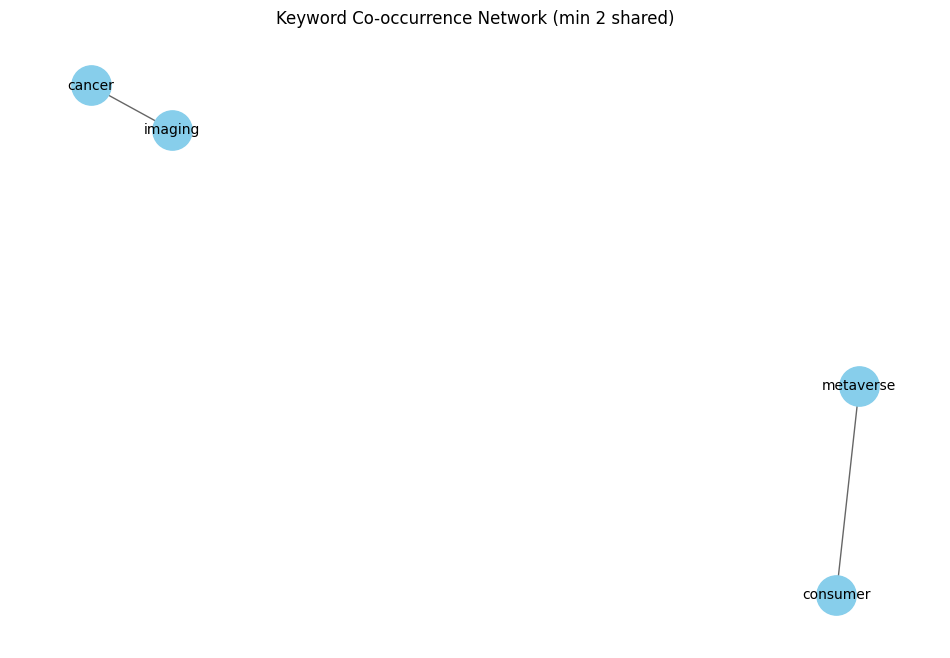

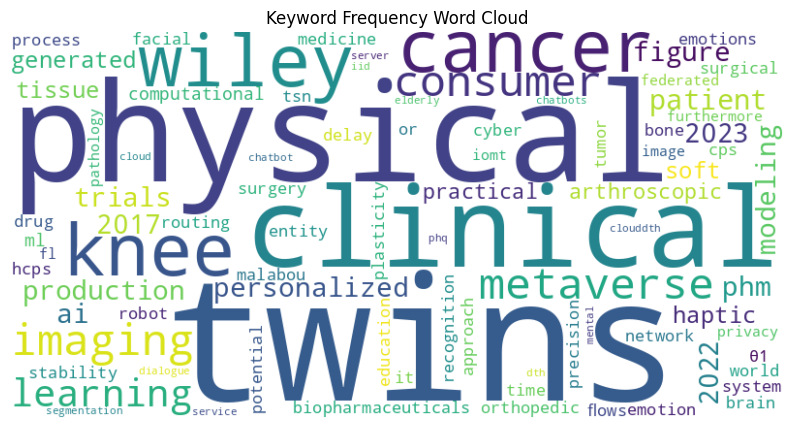

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1024349683.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Keyword", data=top_keywords_df, palette="viridis")


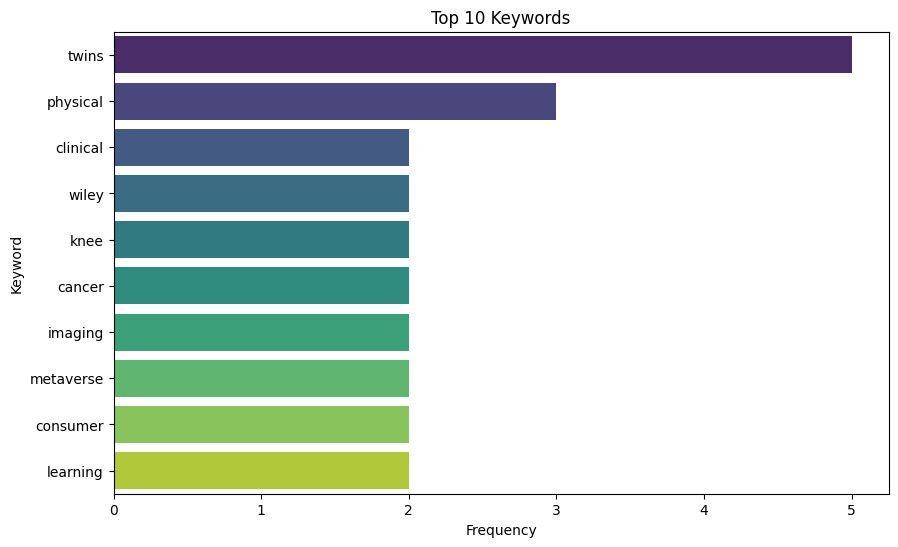

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1024349683.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Method", data=top_methods_df, palette="magma")


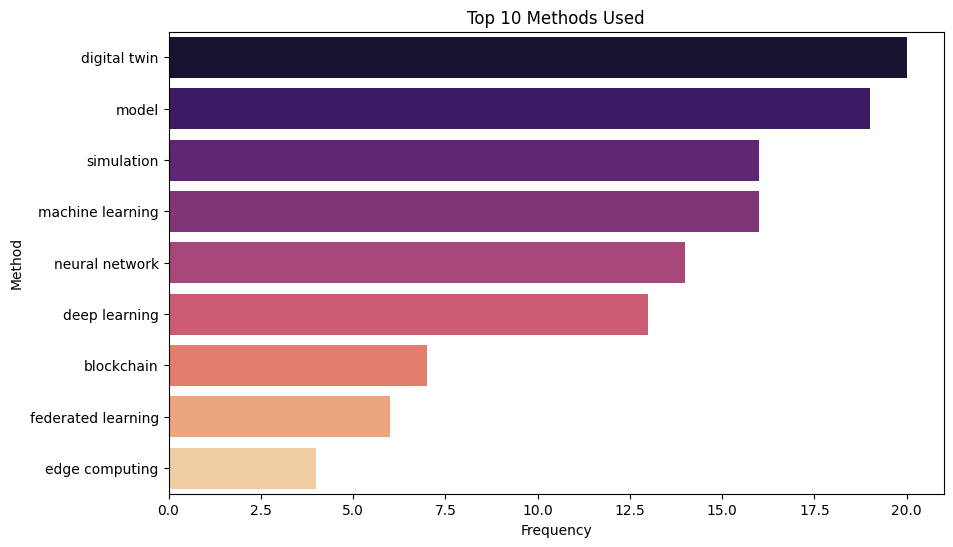

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1024349683.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="uses_data", data=df, palette="Set2")


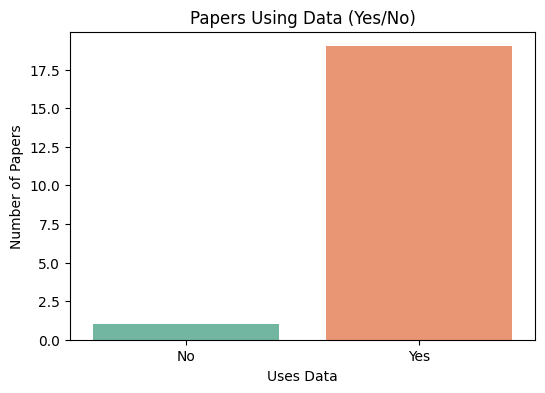

,title,abstract,top_keywords,methods,uses_data,keyword_list,method_list
0,54_Revolutionizing Healthcare A Review Unveili...,"transformative force, holding the promise of r...","patient, personalized, 2023, 2022, figure","simulation, model, machine learning, deep lear...",True,"[patient, personalized, 2023, 2022, figure]","[simulation, model, machine learning, deep lea..."
1,26_Digital twin in industry state of the art,enabling technologies for realizing smart manu...,"physical, phm, 2017, production, modeling","simulation, model, neural network, digital twin",True,"[physical, phm, 2017, production, modeling]","[simulation, model, neural network, digital twin]"
2,45_Increasing acceptance of AI‐generated digit...,Today's approach to medicine requires extensiv...,"ai, clinical, wiley, trials, generated","simulation, model, machine learning, deep lear...",True,"[ai, clinical, wiley, trials, generated]","[simulation, model, machine learning, deep lea..."
3,65_Toward a Digital Twin for Arthroscopic Knee...,The use of digital twins to represent a produc...,"haptic, soft, tissue, arthroscopic, knee","simulation, model, machine learning, deep lear...",True,"[haptic, soft, tissue, arthroscopic, knee]","[simulation, model, machine learning, deep lea..."
4,46_Integrating mechanism based modeling with b...,Digital twins employ mathematical and computat...,"twins, cancer, imaging, practical, computational","model, digital twin",False,"[twins, cancer, imaging, practical, computatio...","[model, digital twin]"
5,34_Exploring the potential of machine learning...,Principles of Industry 4.0 direct us to predic...,"ml, biopharmaceuticals, wiley, process, stability","simulation, model, machine learning, deep lear...",True,"[ml, biopharmaceuticals, wiley, process, stabi...","[simulation, model, machine learning, deep lea..."
6,35_Empowering Healthcare With Cyber Physical S...,"with humans, enhancing the physical world thro...","cps, system, cyber, physical, hcps","simulation, model, machine learning, deep lear...",True,"[cps, system, cyber, physical, hcps]","[simulation, model, machine learning, deep lea..."
7,20_Current advancements in therapeutic approac...,Boolean Operators: We combined the keywords an...,"bone, orthopedic, surgery, surgical, knee","simulation, model, machine learning, deep lear...",True,"[bone, orthopedic, surgery, surgical, knee]","[simulation, model, machine learning, deep lea..."
8,57_Synergizing Digital Twins and Metaverse for...,advancing technologies with various independen...,"metaverse, θ1, consumer, robot, twins","simulation, model, machine learning, digital twin",True,"[metaverse, θ1, consumer, robot, twins]","[simulation, model, machine learning, digital ..."
9,64_Time Sensitive Networking Driven Determinis...,"health (e-health) services, Consumer Internet ...","ﬂows, delay, network, routing, tsn","simulation, model, machine learning, deep lear...",True,"[ﬂows, delay, network, routing, tsn]","[simulation, model, machine learning, deep lea..."


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
from collections import Counter
import itertools
from IPython.display import display


# STEP 1: Prepara e liste
df['keyword_list'] = df['top_keywords'].str.lower().str.split(",\s*")
df['method_list'] = df['methods'].fillna("").str.lower().str.split(",\s*")

# STEP 2: Conteggi
keyword_counter = Counter(itertools.chain.from_iterable(df['keyword_list']))
method_counter = Counter(itertools.chain.from_iterable(df['method_list']))

# STEP 3: Matrice di co-occorrenza
co_occurrence = Counter()
for kw_list in df['keyword_list']:
    for pair in itertools.combinations(sorted(set(kw_list)), 2):
        co_occurrence[pair] += 1

# STEP 4: Network co-occorrenza
G = nx.Graph()
for (kw1, kw2), weight in co_occurrence.items():
    if weight >= 2:
        G.add_edge(kw1, kw2, weight=weight)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Keyword Co-occurrence Network (min 2 shared)")
plt.axis('off')
plt.show()

# STEP 5: WordCloud
plt.figure(figsize=(10, 6))
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counter)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency Word Cloud")
plt.show()

# STEP 6: Top 10 Keywords
top_keywords_df = pd.DataFrame(keyword_counter.most_common(10), columns=['Keyword', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Keyword", data=top_keywords_df, palette="viridis")
plt.title("Top 10 Keywords")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

# STEP 7: Top 10 Methods
top_methods_df = pd.DataFrame(method_counter.most_common(10), columns=['Method', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Method", data=top_methods_df, palette="magma")
plt.title("Top 10 Methods Used")
plt.xlabel("Frequency")
plt.ylabel("Method")
plt.show()

# STEP 8: Distribuzione uses_data
plt.figure(figsize=(6, 4))
sns.countplot(x="uses_data", data=df, palette="Set2")
plt.title("Papers Using Data (Yes/No)")
plt.xlabel("Uses Data")
plt.ylabel("Number of Papers")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Mostra il dataset arricchito
enriched_df = df[['title', 'abstract', 'top_keywords', 'methods', 'uses_data', 'keyword_list', 'method_list']]
display(enriched_df)


In [11]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer



# STEP 1 — Combine title and abstract for real TF-IDF parsing
df['text'] = (df['title'].fillna('') + ' ' + df['abstract'].fillna('')).str.lower()

# STEP 2 — Custom tokenizer: cleans better than simple split
def clean_tokenizer(text):
    words = re.findall(r'\b[a-z]{3,}\b', text)  # at least 3-letter words
    return words

# STEP 3 — Create TF-IDF matrix using real tokenization
vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=2,
    stop_words='english',
    tokenizer=clean_tokenizer,
    max_features=500
)
X = vectorizer.fit_transform(df['text'])
features = vectorizer.get_feature_names_out()

# STEP 4 — Extract top N keywords per paper
top_keywords = []
for row in X.toarray():
    top_indices = row.argsort()[-5:][::-1]
    keywords = [features[i] for i in top_indices if row[i] > 0]
    top_keywords.append(", ".join(keywords))

df['top_keywords'] = top_keywords
df['keyword_list'] = [kw.split(", ") for kw in top_keywords]

# Display enriched optimized dataframe
df_optimized = df[['title', 'abstract', 'top_keywords', 'keyword_list', 'methods', 'uses_data']]
df_optimized.head()


/Users/roberto/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,title,abstract,top_keywords,keyword_list,methods,uses_data
0,54_Revolutionizing Healthcare A Review Unveili...,"transformative force, holding the promise of r...","dts, vol, personalized, figure, twins","[dts, vol, personalized, figure, twins]","simulation, model, machine learning, deep lear...",True
1,26_Digital twin in industry state of the art,enabling technologies for realizing smart manu...,"dts, production, service, tao, manufacturing","[dts, production, service, tao, manufacturing]","simulation, model, neural network, digital twin",True
2,45_Increasing acceptance of AI‐generated digit...,Today's approach to medicine requires extensiv...,"clinical, dts, wiley, trials, generated","[clinical, dts, wiley, trials, generated]","simulation, model, machine learning, deep lear...",True
3,65_Toward a Digital Twin for Arthroscopic Knee...,The use of digital twins to represent a produc...,"haptic, soft, tissue, arthroscopic, vol","[haptic, soft, tissue, arthroscopic, vol]","simulation, model, machine learning, deep lear...",True
4,46_Integrating mechanism based modeling with b...,Digital twins employ mathematical and computat...,"twins, cancer, imaging, computational, object","[twins, cancer, imaging, computational, object]","model, digital twin",False


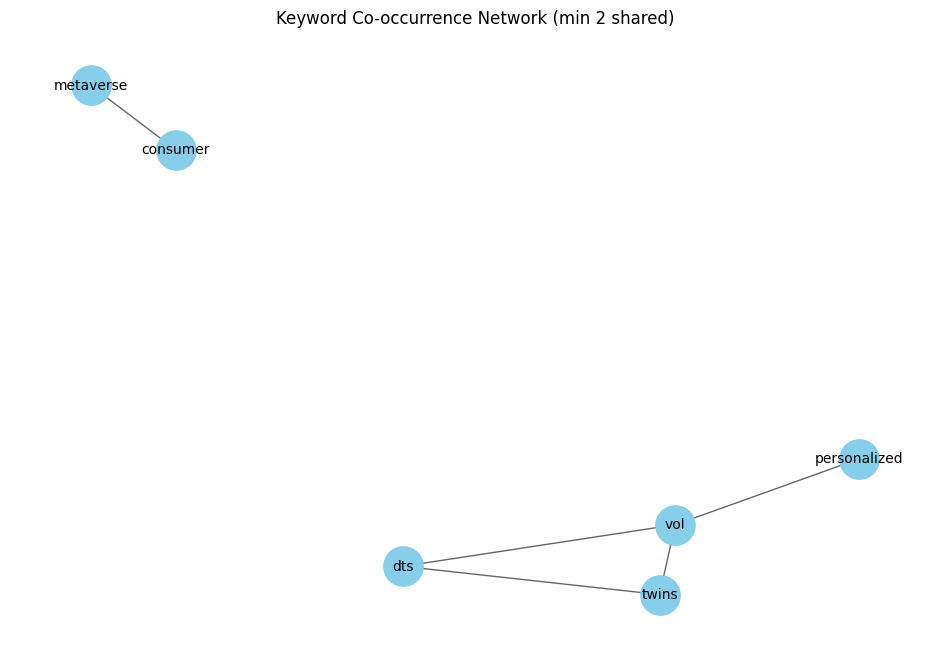

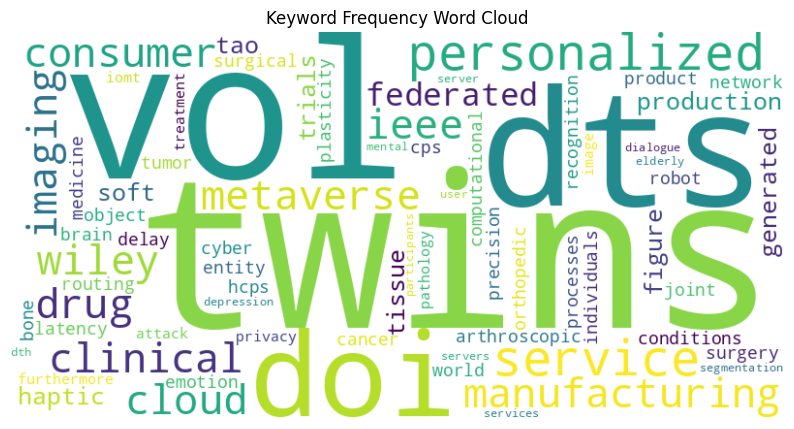

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1441326259.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Keyword", data=top_keywords_df, palette="viridis")


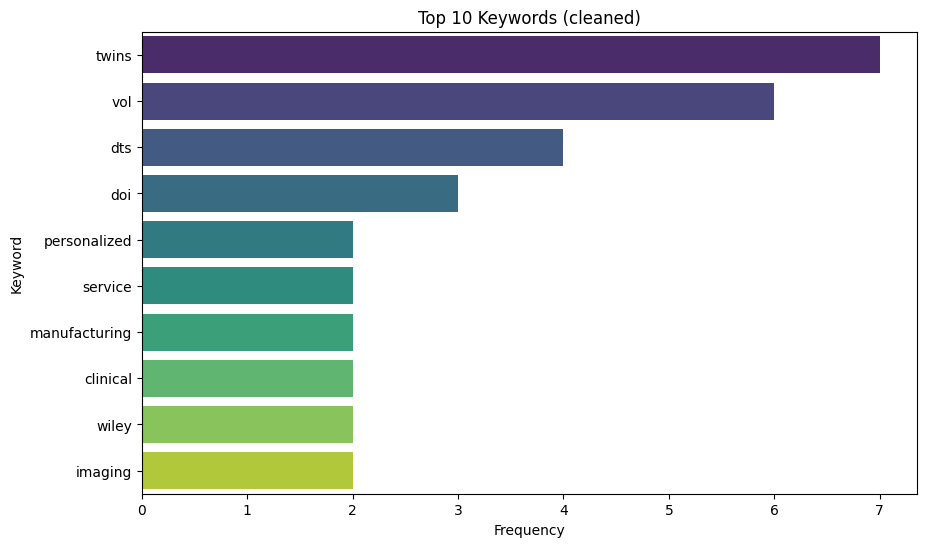

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1441326259.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Method", data=top_methods_df, palette="magma")


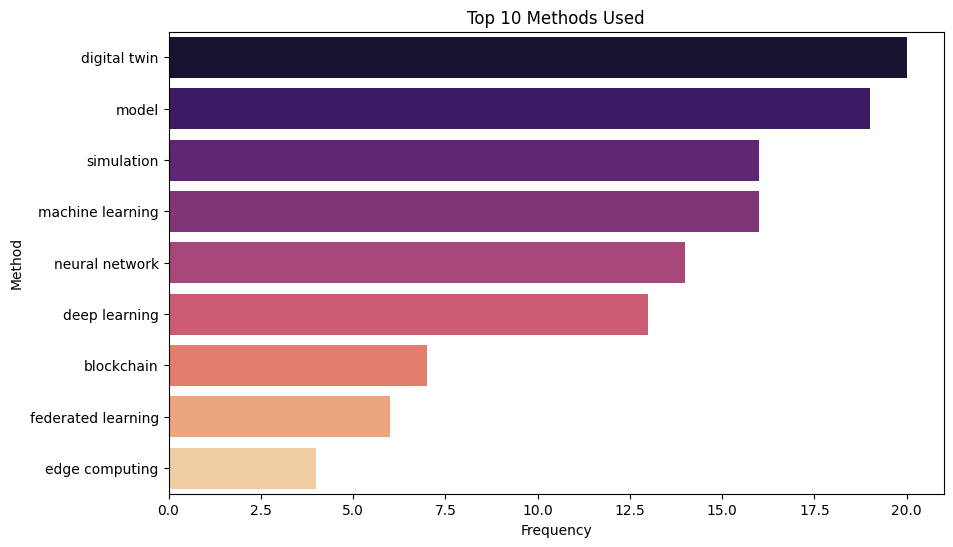

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1441326259.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="uses_data", data=df, palette="Set2")


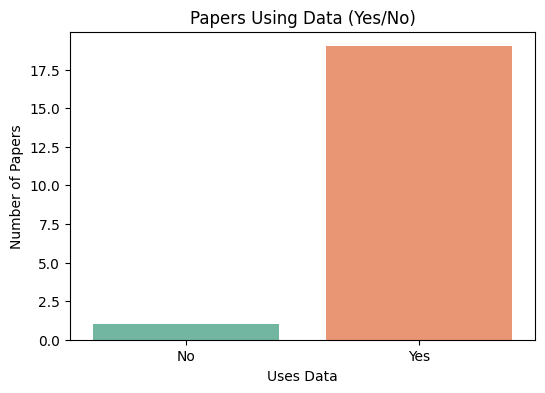

,title,top_keywords,keyword_list,methods,uses_data
0,54_Revolutionizing Healthcare A Review Unveili...,"dts, vol, personalized, figure, twins","[dts, vol, personalized, figure, twins]","simulation, model, machine learning, deep lear...",True
1,26_Digital twin in industry state of the art,"dts, production, service, tao, manufacturing","[dts, production, service, tao, manufacturing]","simulation, model, neural network, digital twin",True
2,45_Increasing acceptance of AI‐generated digit...,"clinical, dts, wiley, trials, generated","[clinical, dts, wiley, trials, generated]","simulation, model, machine learning, deep lear...",True
3,65_Toward a Digital Twin for Arthroscopic Knee...,"haptic, soft, tissue, arthroscopic, vol","[haptic, soft, tissue, arthroscopic, vol]","simulation, model, machine learning, deep lear...",True
4,46_Integrating mechanism based modeling with b...,"twins, cancer, imaging, computational, object","[twins, cancer, imaging, computational, object]","model, digital twin",False


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
from collections import Counter
import itertools
from IPython.display import display

# STEP 1 — Conteggio parole chiave reali
keyword_counter = Counter(itertools.chain.from_iterable(df['keyword_list']))

# STEP 2 — Co-occorrenza parole chiave (minimo 2 paper condivisi)
co_occurrence = Counter()
for kw_list in df['keyword_list']:
    for pair in itertools.combinations(sorted(set(kw_list)), 2):
        co_occurrence[pair] += 1

# STEP 3 — Network di co-occorrenza
G = nx.Graph()
for (kw1, kw2), weight in co_occurrence.items():
    if weight >= 2:
        G.add_edge(kw1, kw2, weight=weight)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Keyword Co-occurrence Network (min 2 shared)")
plt.axis('off')
plt.show()

# STEP 4 — WordCloud aggiornato
plt.figure(figsize=(10, 6))
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counter)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency Word Cloud")
plt.show()

# STEP 5 — Barplot parole chiave
top_keywords_df = pd.DataFrame(keyword_counter.most_common(10), columns=['Keyword', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Keyword", data=top_keywords_df, palette="viridis")
plt.title("Top 10 Keywords (cleaned)")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()

# STEP 6 — Conteggio metodi
method_list = df['methods'].fillna("").str.lower().str.split(",\s*")
method_counter = Counter(itertools.chain.from_iterable(method_list))

top_methods_df = pd.DataFrame(method_counter.most_common(10), columns=['Method', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Method", data=top_methods_df, palette="magma")
plt.title("Top 10 Methods Used")
plt.xlabel("Frequency")
plt.ylabel("Method")
plt.show()

# STEP 7 — Papers using data
plt.figure(figsize=(6, 4))
sns.countplot(x="uses_data", data=df, palette="Set2")
plt.title("Papers Using Data (Yes/No)")
plt.xlabel("Uses Data")
plt.ylabel("Number of Papers")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Final display
display(df[['title', 'top_keywords', 'keyword_list', 'methods', 'uses_data']].head())


In [14]:
# Rewriting previous code using seaborn-only visuals where possible
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
from collections import Counter
import itertools
import re
from sklearn.feature_extraction.text import TfidfVectorizer


# Combine and clean text
df['text'] = (df['title'].fillna('') + ' ' + df['abstract'].fillna('')).str.lower()

# Define the stopwords to remove
custom_stopwords = {"vol", "dts", "doi", "ieee"}

# Example function to filter out the stopwords from a list
def remove_custom_stopwords(keyword_list):
    return [kw for kw in keyword_list if kw.lower() not in custom_stopwords]

# Apply the function to 'top_keywords' and 'keyword_list' columns
enriched_df["top_keywords"] = df["top_keywords"].apply(lambda x: ', '.join(remove_custom_stopwords(x.split(', '))))
enriched_df["keyword_list"] = df["keyword_list"].apply(remove_custom_stopwords)

# Display the cleaned DataFrame
display(enriched_df)



/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1830405824.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enriched_df["top_keywords"] = df["top_keywords"].apply(lambda x: ', '.join(remove_custom_stopwords(x.split(', '))))
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1830405824.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enriched_df["keyword_list"] = df["keyword_list"].apply(remove_custom_stopwords)


,title,abstract,top_keywords,methods,uses_data,keyword_list,method_list
0,54_Revolutionizing Healthcare A Review Unveili...,"transformative force, holding the promise of r...","personalized, figure, twins","simulation, model, machine learning, deep lear...",True,"[personalized, figure, twins]","[simulation, model, machine learning, deep lea..."
1,26_Digital twin in industry state of the art,enabling technologies for realizing smart manu...,"production, service, tao, manufacturing","simulation, model, neural network, digital twin",True,"[production, service, tao, manufacturing]","[simulation, model, neural network, digital twin]"
2,45_Increasing acceptance of AI‐generated digit...,Today's approach to medicine requires extensiv...,"clinical, wiley, trials, generated","simulation, model, machine learning, deep lear...",True,"[clinical, wiley, trials, generated]","[simulation, model, machine learning, deep lea..."
3,65_Toward a Digital Twin for Arthroscopic Knee...,The use of digital twins to represent a produc...,"haptic, soft, tissue, arthroscopic","simulation, model, machine learning, deep lear...",True,"[haptic, soft, tissue, arthroscopic]","[simulation, model, machine learning, deep lea..."
4,46_Integrating mechanism based modeling with b...,Digital twins employ mathematical and computat...,"twins, cancer, imaging, computational, object","model, digital twin",False,"[twins, cancer, imaging, computational, object]","[model, digital twin]"
5,34_Exploring the potential of machine learning...,Principles of Industry 4.0 direct us to predic...,"wiley, product, manufacturing, drug, conditions","simulation, model, machine learning, deep lear...",True,"[wiley, product, manufacturing, drug, conditions]","[simulation, model, machine learning, deep lea..."
6,35_Empowering Healthcare With Cyber Physical S...,"with humans, enhancing the physical world thro...","cps, cyber, hcps, cloud","simulation, model, machine learning, deep lear...",True,"[cps, cyber, hcps, cloud]","[simulation, model, machine learning, deep lea..."
7,20_Current advancements in therapeutic approac...,Boolean Operators: We combined the keywords an...,"bone, orthopedic, surgery, surgical","simulation, model, machine learning, deep lear...",True,"[bone, orthopedic, surgery, surgical]","[simulation, model, machine learning, deep lea..."
8,57_Synergizing Digital Twins and Metaverse for...,advancing technologies with various independen...,"metaverse, consumer, robot, twins, joint","simulation, model, machine learning, digital twin",True,"[metaverse, consumer, robot, twins, joint]","[simulation, model, machine learning, digital ..."
9,64_Time Sensitive Networking Driven Determinis...,"health (e-health) services, Consumer Internet ...","delay, network, routing, latency","simulation, model, machine learning, deep lear...",True,"[delay, network, routing, latency]","[simulation, model, machine learning, deep lea..."


/Users/roberto/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1159743930.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig_kw = sns.catplot(data=top_kw_df, x="Count", y="Keyword", kind="bar", palette="viridis", height=6, aspect=1.5)


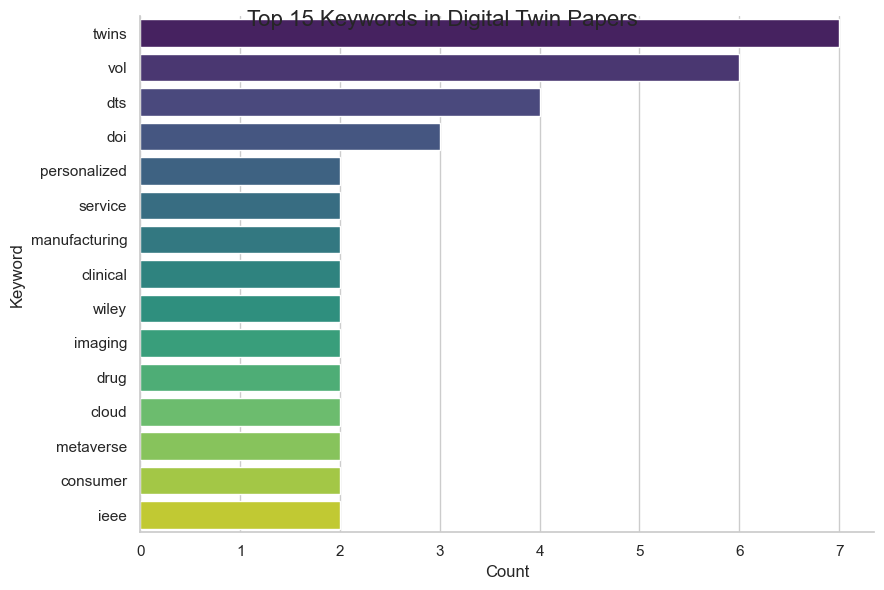

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1159743930.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig_meth = sns.catplot(data=top_meth_df, x="Count", y="Method", kind="bar", palette="magma", height=6, aspect=1.5)


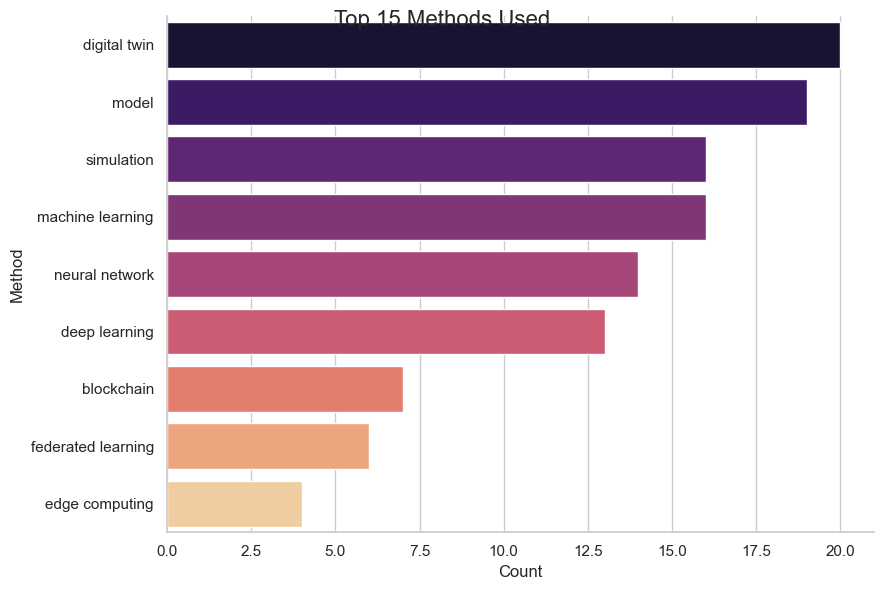

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1159743930.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig_data = sns.catplot(x="uses_data", kind="count", data=df, palette="Set2", height=4, aspect=1.2)


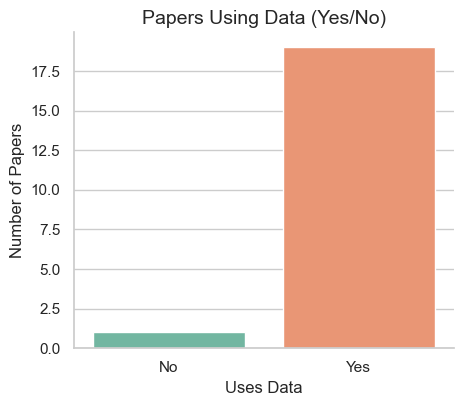

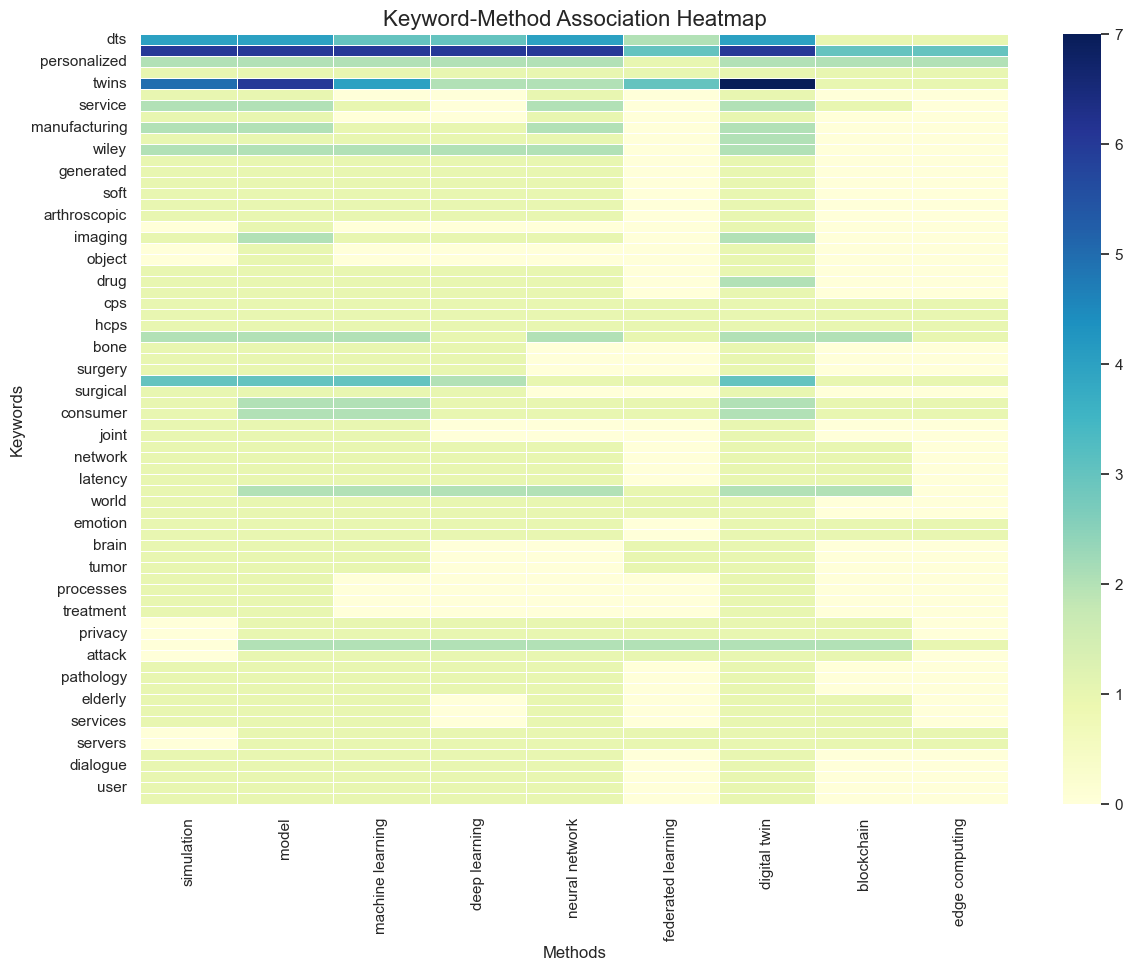

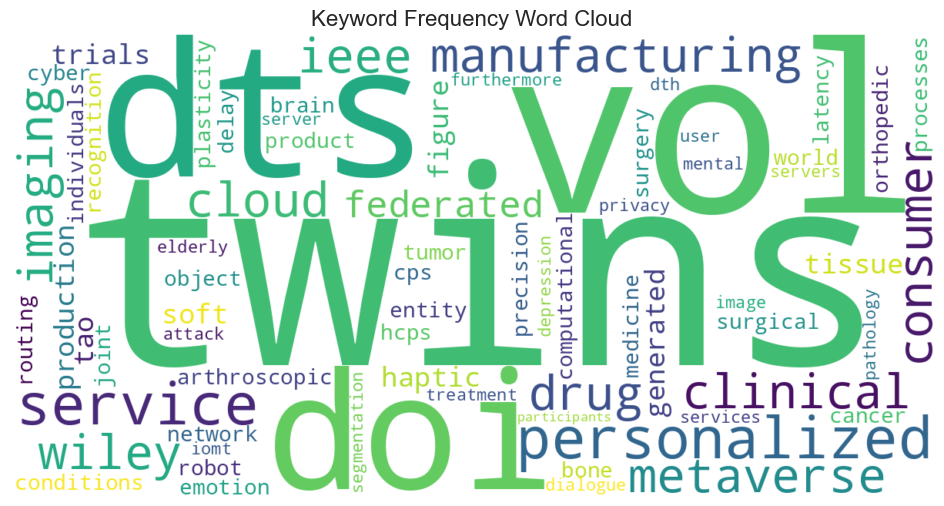

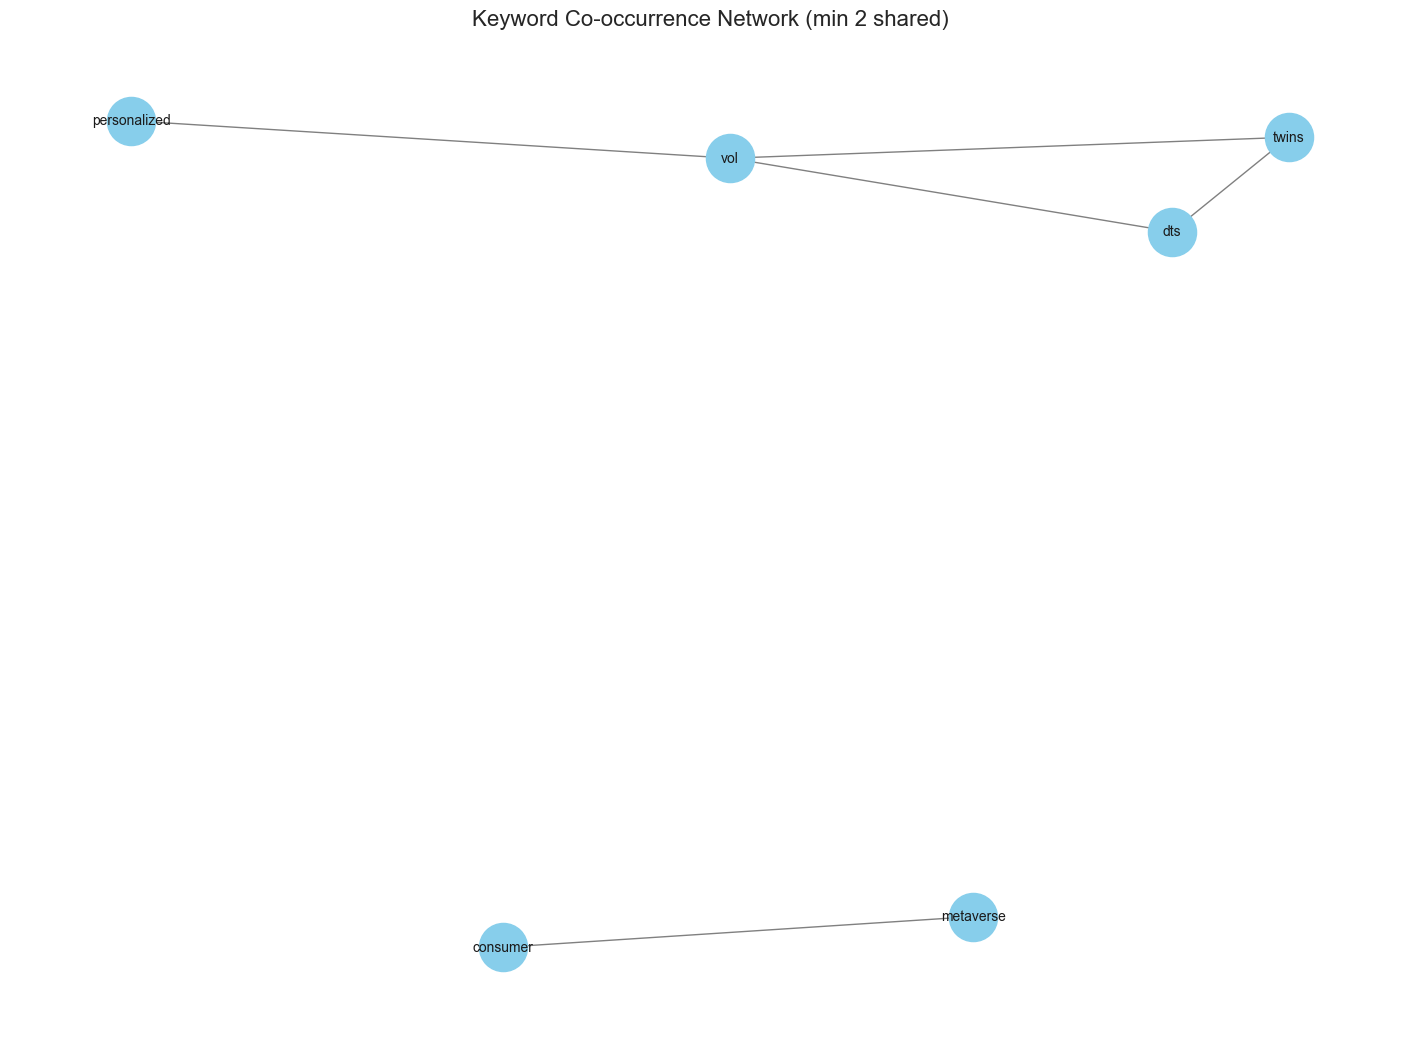

In [15]:

# Tokenizer and TF-IDF
def clean_tokenizer(text):
    return re.findall(r'\b[a-z]{3,}\b', text)

vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=2,
    stop_words='english',
    tokenizer=clean_tokenizer,
    max_features=500
)
X = vectorizer.fit_transform(df['text'])
features = vectorizer.get_feature_names_out()

# Top keywords per paper
top_keywords = []
for row in X.toarray():
    top_indices = row.argsort()[-5:][::-1]
    keywords = [features[i] for i in top_indices if row[i] > 0]
    top_keywords.append(", ".join(keywords))

df['top_keywords'] = top_keywords
df['keyword_list'] = [kw.split(", ") for kw in top_keywords]

# Normalize methods
df['method_list'] = df['methods'].fillna("").str.lower().str.split(",\s*")

# Keyword and method frequencies
keyword_counter = Counter(itertools.chain.from_iterable(df['keyword_list']))
method_counter = Counter(itertools.chain.from_iterable(df['method_list']))

# Co-occurrence network
co_occurrence = Counter()
for kw_list in df['keyword_list']:
    for pair in itertools.combinations(sorted(set(kw_list)), 2):
        co_occurrence[pair] += 1

# === SEABORN-BASED VISUALS ===
sns.set(style="whitegrid")

# Top Keywords
top_kw_df = pd.DataFrame(keyword_counter.most_common(15), columns=['Keyword', 'Count'])
fig_kw = sns.catplot(data=top_kw_df, x="Count", y="Keyword", kind="bar", palette="viridis", height=6, aspect=1.5)
fig_kw.fig.suptitle("Top 15 Keywords in Digital Twin Papers", fontsize=16)
plt.show()

# Top Methods
top_meth_df = pd.DataFrame(method_counter.most_common(15), columns=['Method', 'Count'])
fig_meth = sns.catplot(data=top_meth_df, x="Count", y="Method", kind="bar", palette="magma", height=6, aspect=1.5)
fig_meth.fig.suptitle("Top 15 Methods Used", fontsize=16)
plt.show()

# Uses Data Distribution
fig_data = sns.catplot(x="uses_data", kind="count", data=df, palette="Set2", height=4, aspect=1.2)
fig_data.set_axis_labels("Uses Data", "Number of Papers")
fig_data.set_titles("Papers Using Data (Yes/No)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Papers Using Data (Yes/No)", fontsize=14)
plt.show()

# Keyword-Method Heatmap
kw_meth_matrix = pd.DataFrame(0, index=keyword_counter.keys(), columns=method_counter.keys())
for i, row in df.iterrows():
    for kw in row['keyword_list']:
        for meth in row['method_list']:
            kw_meth_matrix.loc[kw, meth] += 1

# Filter frequent
kw_meth_filtered = kw_meth_matrix.loc[kw_meth_matrix.sum(axis=1) > 1, kw_meth_matrix.sum() > 1]

plt.figure(figsize=(14, 10))
sns.heatmap(kw_meth_filtered, cmap="YlGnBu", linewidths=0.5)
plt.title("Keyword-Method Association Heatmap", fontsize=16)
plt.xlabel("Methods")
plt.ylabel("Keywords")
plt.show()

# WordCloud (Matplotlib only — seaborn not applicable here)
plt.figure(figsize=(12, 6))
wc = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(keyword_counter)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency Word Cloud", fontsize=16)
plt.show()

# NetworkX (remains matplotlib based — not supported via seaborn)
G = nx.Graph()
for (kw1, kw2), weight in co_occurrence.items():
    if weight >= 2:
        G.add_edge(kw1, kw2, weight=weight)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.7)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=10, edge_color='gray')
plt.title("Keyword Co-occurrence Network (min 2 shared)", fontsize=16)
plt.axis('off')
plt.show()


/Users/roberto/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1992702232.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig_kw = sns.catplot(


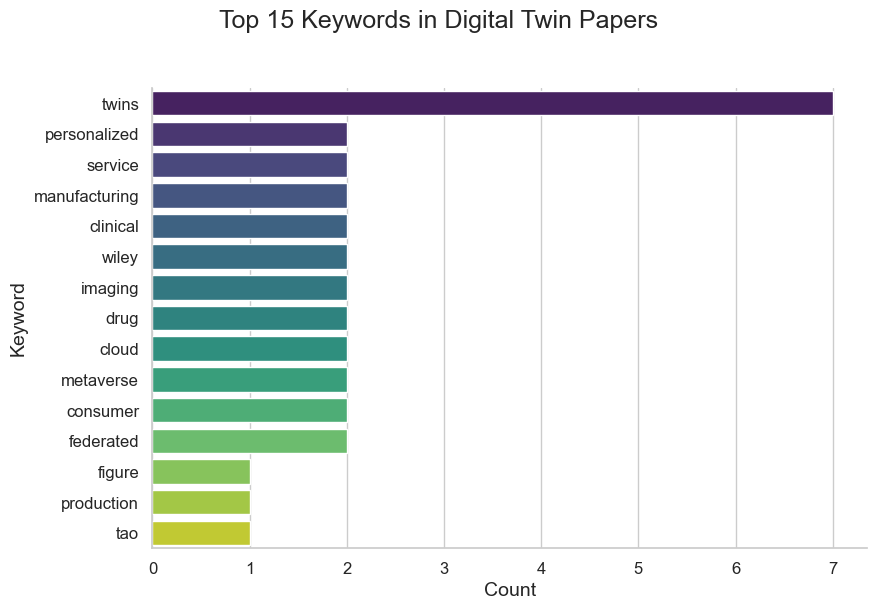

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1992702232.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig_meth = sns.catplot(


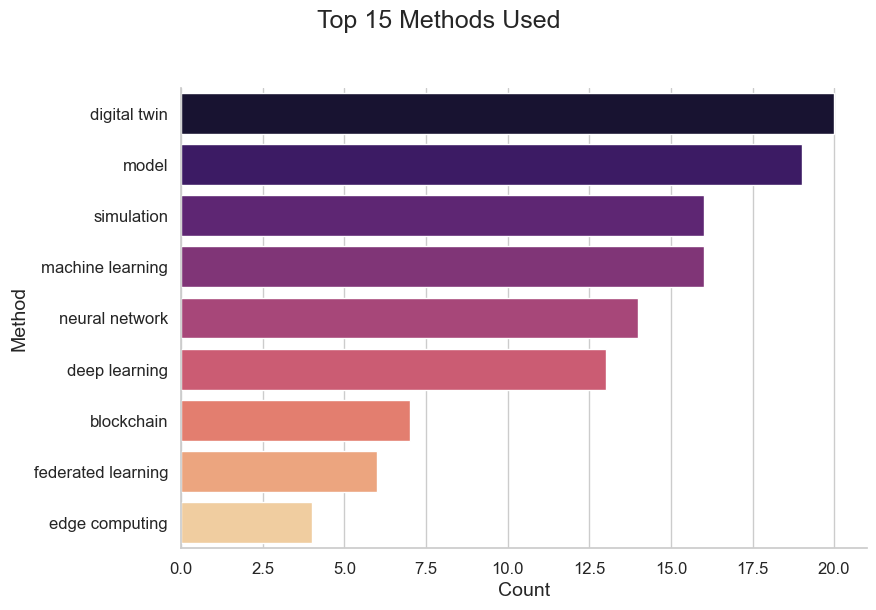

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1992702232.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig_data = sns.catplot(


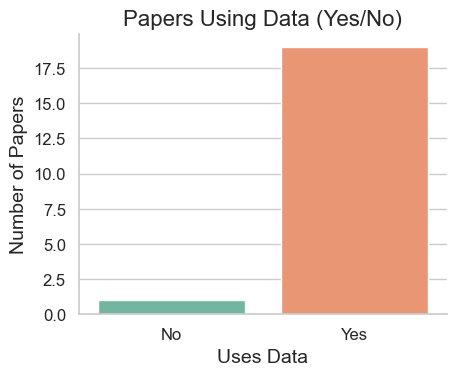

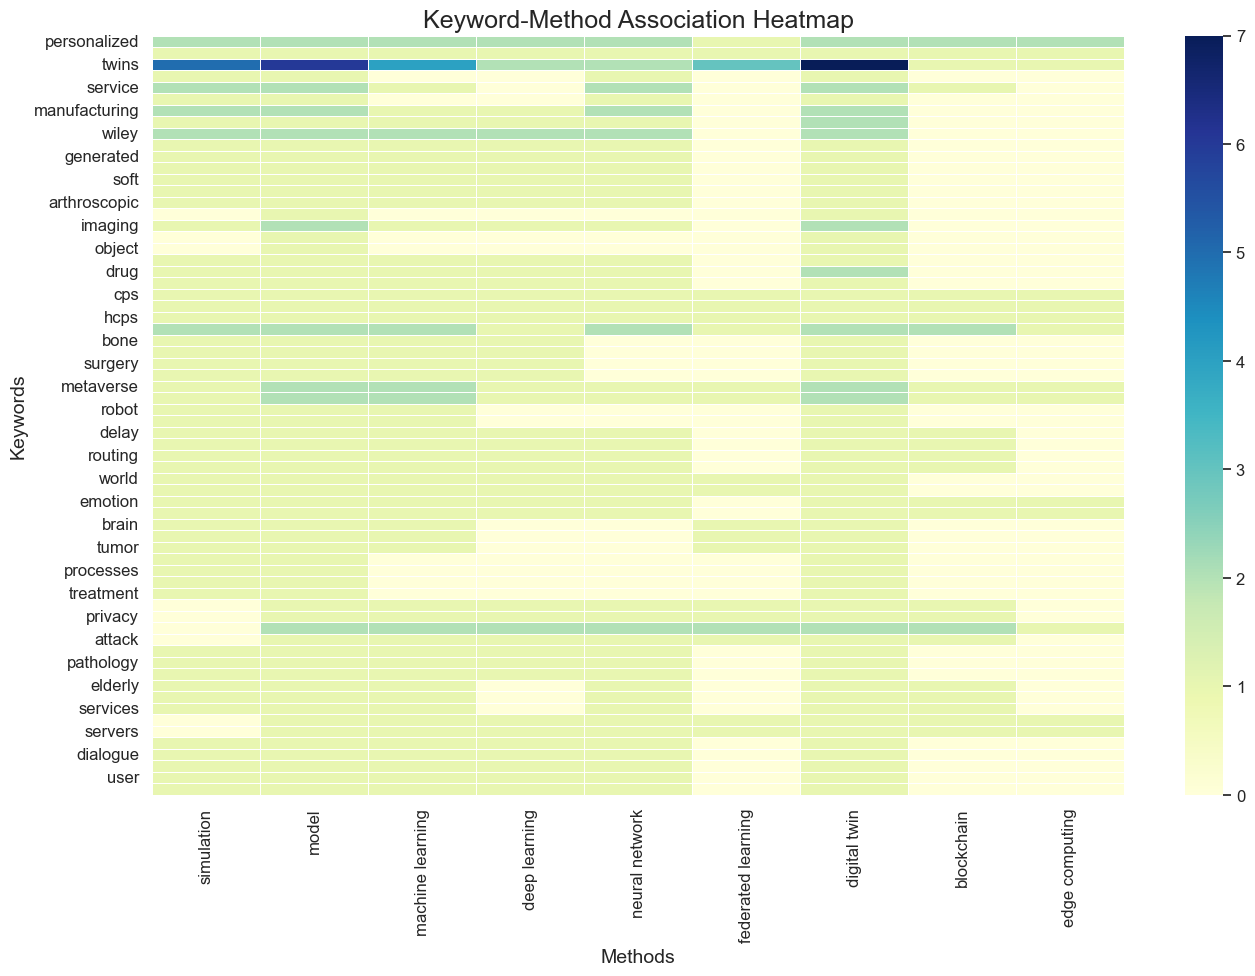

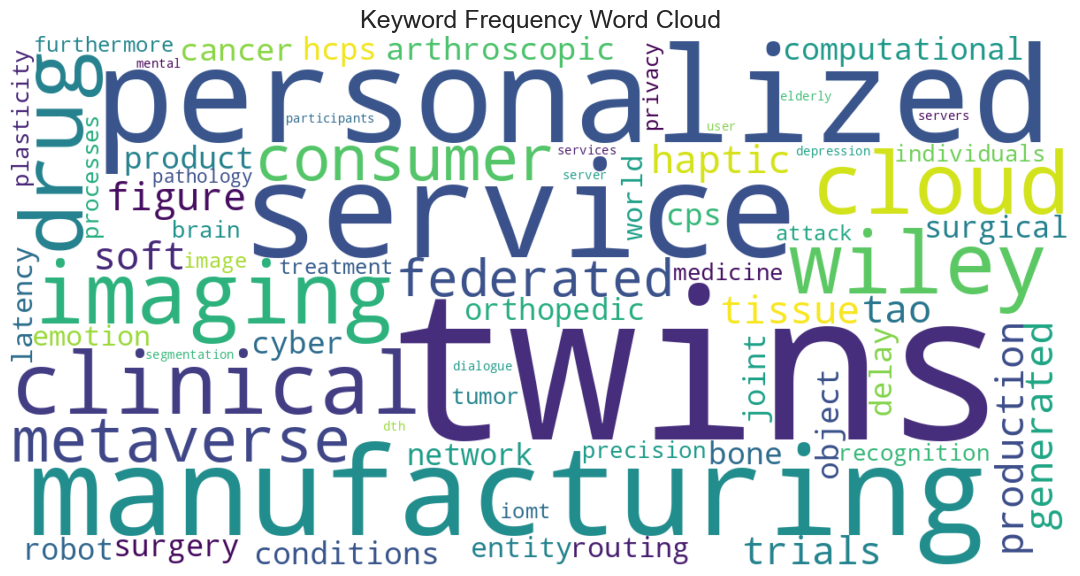

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_2585/1992702232.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


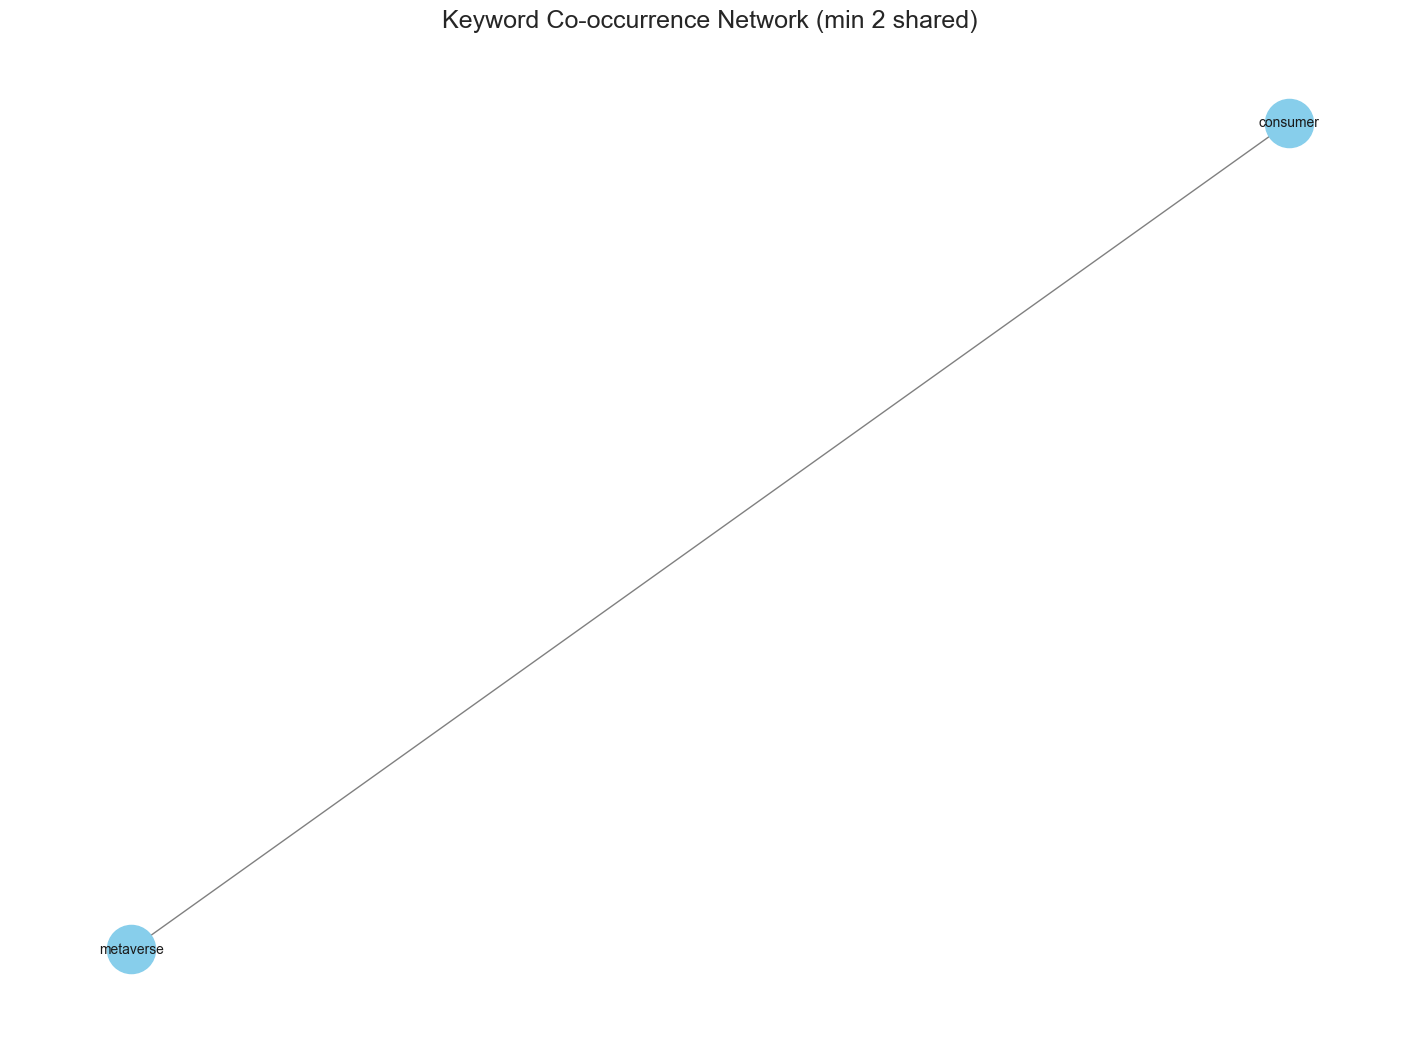

In [19]:
### optimized version --> removed the stop-words like dts, doi , ieee.... specifc for paper document based :.. 

import re
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import networkx as nx

# === CUSTOM STOPWORDS (Domain-Specific) ===
custom_stopwords = {"vol", "dts", "doi", "ieee", "Wiley"}

# === TOKENIZER AND TF-IDF ===
def clean_tokenizer(text):
    return re.findall(r'\b[a-z]{3,}\b', text)

vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=2,
    stop_words='english',
    tokenizer=clean_tokenizer,
    max_features=500
)
X = vectorizer.fit_transform(df['text'])
features = vectorizer.get_feature_names_out()

# === TOP KEYWORDS PER PAPER (Filter Custom Stopwords) ===
top_keywords = []
for row in X.toarray():
    top_indices = row.argsort()[-5:][::-1]
    keywords = [features[i] for i in top_indices if row[i] > 0 and features[i].lower() not in custom_stopwords]
    top_keywords.append(", ".join(keywords))

df['top_keywords'] = top_keywords
df['keyword_list'] = [kw.split(", ") for kw in top_keywords]

# === NORMALIZE METHODS ===
df['method_list'] = df['methods'].fillna("").str.lower().str.split(",\s*")

# === FREQUENCY COUNTERS ===
keyword_counter = Counter(itertools.chain.from_iterable(df['keyword_list']))
method_counter = Counter(itertools.chain.from_iterable(df['method_list']))

# === CO-OCCURRENCE NETWORK ===
co_occurrence = Counter()
for kw_list in df['keyword_list']:
    for pair in itertools.combinations(sorted(set(kw_list)), 2):
        co_occurrence[pair] += 1

# === GLOBAL STYLE SETTINGS ===
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

# === TOP 15 KEYWORDS ===
top_kw_df = pd.DataFrame(keyword_counter.most_common(15), columns=['Keyword', 'Count'])
fig_kw = sns.catplot(
    data=top_kw_df,
    x="Count",
    y="Keyword",
    kind="bar",
    palette="viridis",
    height=6,
    aspect=1.5
)
fig_kw.set_axis_labels("Count", "Keyword", fontsize=14)
fig_kw.set_titles("")
fig_kw.fig.suptitle("Top 15 Keywords in Digital Twin Papers", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# === TOP 15 METHODS ===
top_meth_df = pd.DataFrame(method_counter.most_common(15), columns=['Method', 'Count'])
fig_meth = sns.catplot(
    data=top_meth_df,
    x="Count",
    y="Method",
    kind="bar",
    palette="magma",
    height=6,
    aspect=1.5
)
fig_meth.set_axis_labels("Count", "Method", fontsize=14)
fig_meth.set_titles("")
fig_meth.fig.suptitle("Top 15 Methods Used", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

# === USES DATA DISTRIBUTION ===
fig_data = sns.catplot(
    x="uses_data",
    kind="count",
    data=df,
    palette="Set2",
    height=4,
    aspect=1.2
)
fig_data.set_axis_labels("Uses Data", "Number of Papers")
fig_data.set_titles("")
plt.xticks([0, 1], ['No', 'Yes'])
plt.title("Papers Using Data (Yes/No)", fontsize=16)
plt.tight_layout()
plt.show()

# === HEATMAP OF KEYWORDS x METHODS ===
kw_meth_matrix = pd.DataFrame(0, index=keyword_counter.keys(), columns=method_counter.keys())
for i, row in df.iterrows():
    for kw in row['keyword_list']:
        for meth in row['method_list']:
            kw_meth_matrix.loc[kw, meth] += 1

kw_meth_filtered = kw_meth_matrix.loc[kw_meth_matrix.sum(axis=1) > 1, kw_meth_matrix.sum() > 1]

plt.figure(figsize=(14, 10))
sns.heatmap(kw_meth_filtered, cmap="YlGnBu", linewidths=0.5)
plt.title("Keyword-Method Association Heatmap", fontsize=18)
plt.xlabel("Methods")
plt.ylabel("Keywords")
plt.tight_layout()
plt.show()

# === WORDCLOUD ===
plt.figure(figsize=(12, 6))
wc = WordCloud(width=1200, height=600, background_color='white').generate_from_frequencies(keyword_counter)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Frequency Word Cloud", fontsize=18)
plt.tight_layout()
plt.show()

# === NETWORK GRAPH (Keyword Co-occurrence) ===
G = nx.Graph()
for (kw1, kw2), weight in co_occurrence.items():
    if weight >= 2:
        G.add_edge(kw1, kw2, weight=weight)

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.7)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, font_size=10, edge_color='gray')
plt.title("Keyword Co-occurrence Network (min 2 shared)", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


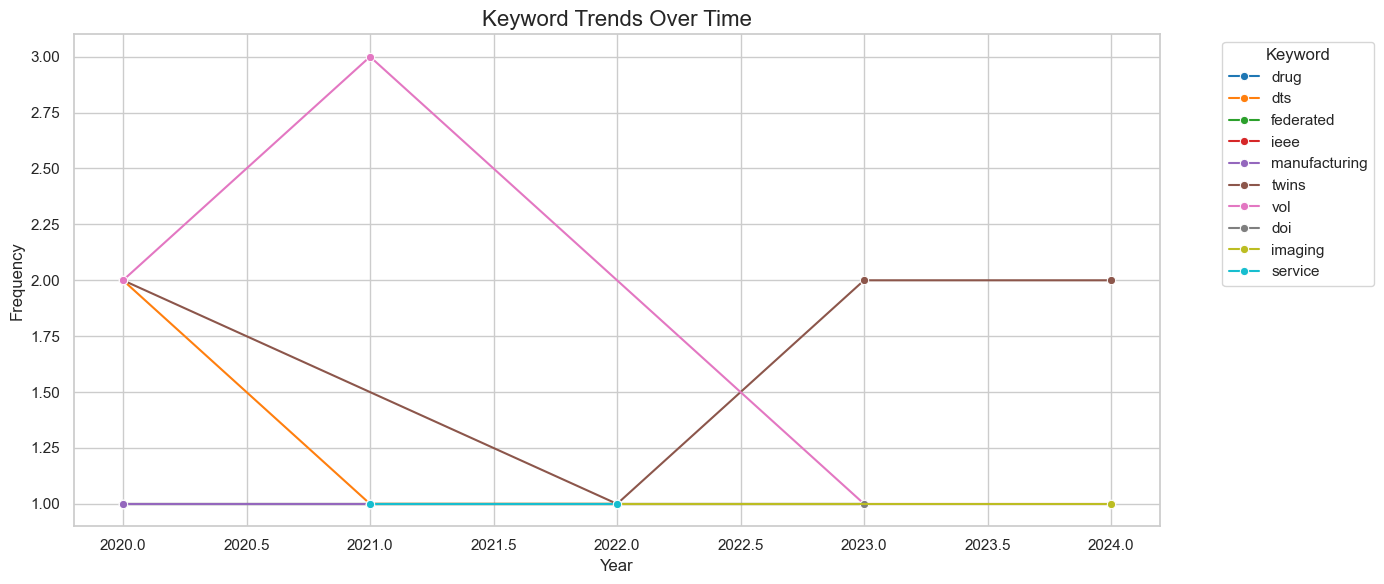

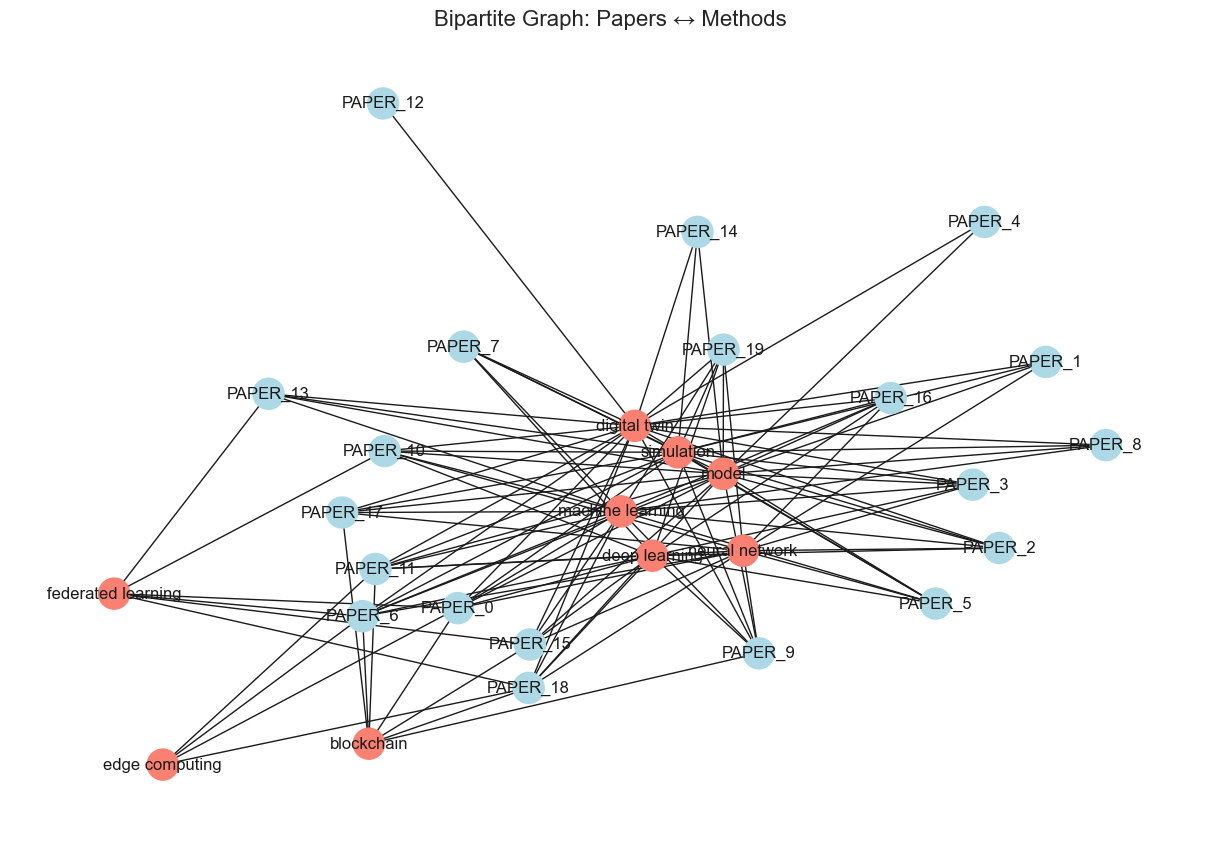

/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_71667/1639845785.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_count, y='country', x='count', palette='crest')


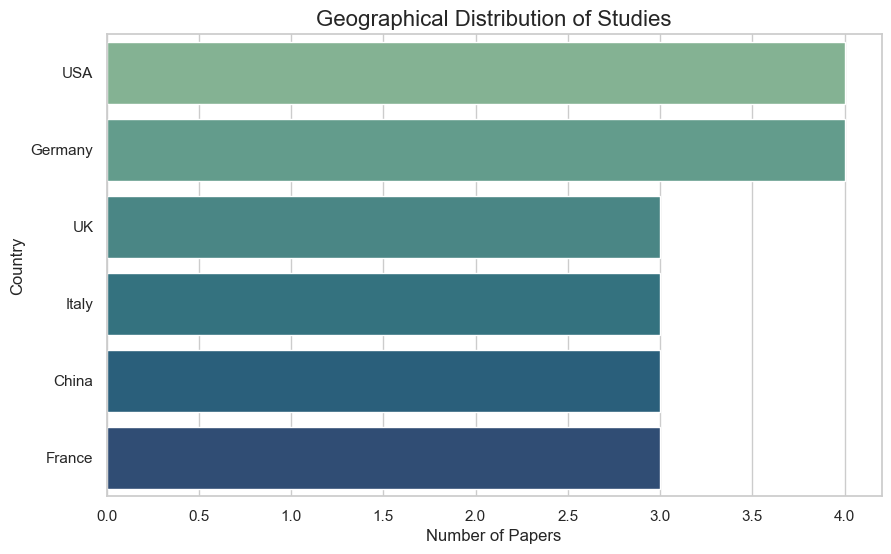

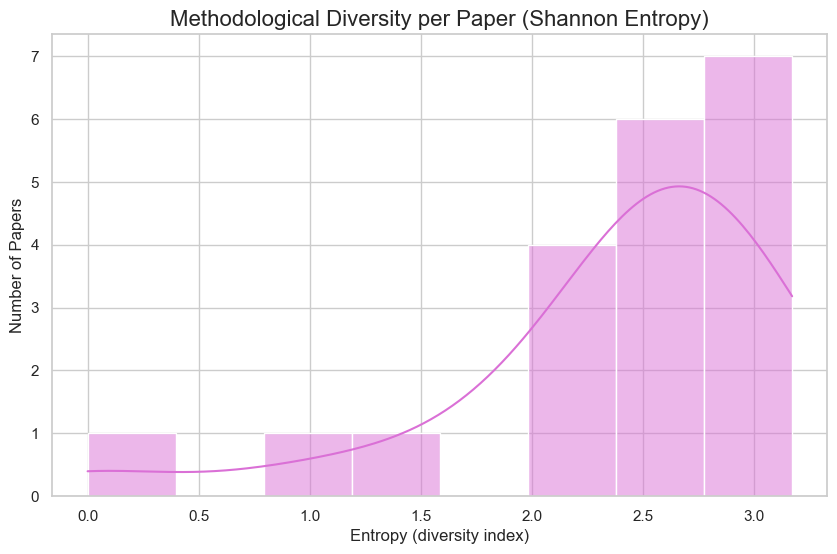

In [11]:
# Re-imports after kernel reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
import itertools
import numpy as np
from math import log2

# Mock year and country (demo purposes – to replace with actual metadata)
mock_years = [2020, 2021, 2022, 2023, 2024] * 6
mock_country = ["USA", "Germany", "UK", "Italy", "China", "France"] * 5

df['year'] = mock_years[:len(df)]
df['country'] = mock_country[:len(df)]

# Extract keyword and method lists
df['keyword_list'] = df['top_keywords'].str.lower().str.split(",\s*")
df['method_list'] = df['methods'].fillna("").str.lower().str.split(",\s*")

# === TEMPORAL TREND ANALYSIS ===
df_keywords_time = df.explode("keyword_list")
trend_data = df_keywords_time.groupby(['year', 'keyword_list']).size().reset_index(name='count')

# Most common keywords
top_keywords = trend_data.groupby('keyword_list')['count'].sum().sort_values(ascending=False).head(10).index
trend_filtered = trend_data[trend_data['keyword_list'].isin(top_keywords)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_filtered, x="year", y="count", hue="keyword_list", marker='o', palette="tab10")
plt.title("Keyword Trends Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# === BIPARTITE GRAPH: Paper–Method ===
B = nx.Graph()
for i, row in df.iterrows():
    paper_node = f"PAPER_{i}"
    B.add_node(paper_node, type='paper')
    for method in row['method_list']:
        B.add_node(method, type='method')
        B.add_edge(paper_node, method)

paper_nodes = [n for n, d in B.nodes(data=True) if d['type'] == 'paper']
pos = nx.spring_layout(B, k=0.5)

plt.figure(figsize=(12, 8))
nx.draw(B, pos, with_labels=True, node_size=500,
        node_color=['lightblue' if n in paper_nodes else 'salmon' for n in B.nodes()])
plt.title("Bipartite Graph: Papers ↔ Methods", fontsize=16)
plt.axis('off')
plt.show()

# === COUNTRY DISTRIBUTION BARPLOT ===
country_count = df['country'].value_counts().reset_index()
country_count.columns = ['country', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(data=country_count, y='country', x='count', palette='crest')
plt.title("Geographical Distribution of Studies", fontsize=16)
plt.xlabel("Number of Papers")
plt.ylabel("Country")
plt.show()

# === METHOD DIVERSITY: SHANNON ENTROPY ===
def shannon_entropy(methods):
    total = len(methods)
    if total == 0:
        return 0
    counts = Counter(methods)
    entropy = -sum((c/total) * log2(c/total) for c in counts.values())
    return round(entropy, 2)

df['method_entropy'] = df['method_list'].apply(shannon_entropy)

plt.figure(figsize=(10, 6))
sns.histplot(df['method_entropy'], bins=8, kde=True, color="orchid")
plt.title("Methodological Diversity per Paper (Shannon Entropy)", fontsize=16)
plt.xlabel("Entropy (diversity index)")
plt.ylabel("Number of Papers")
plt.show()

/Users/roberto/.pyenv/versions/3.11.6/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7
Topic 1,cloud,bone,elderly,orthopedic,doi,cps,dth
Topic 2,mental,dts,iomt,privacy,drug,vol,federated
Topic 3,emotion,twins,recognition,delay,network,cancer,routing
Topic 4,vol,twins,metaverse,tissue,haptic,imaging,consumer
Topic 5,dts,twins,wiley,brain,clinical,plasticity,personalized


/var/folders/jp/fnr369_172b9ghtllhyqdmtw0000gp/T/ipykernel_71667/3270272167.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="semantic_cluster", data=df, palette="pastel")


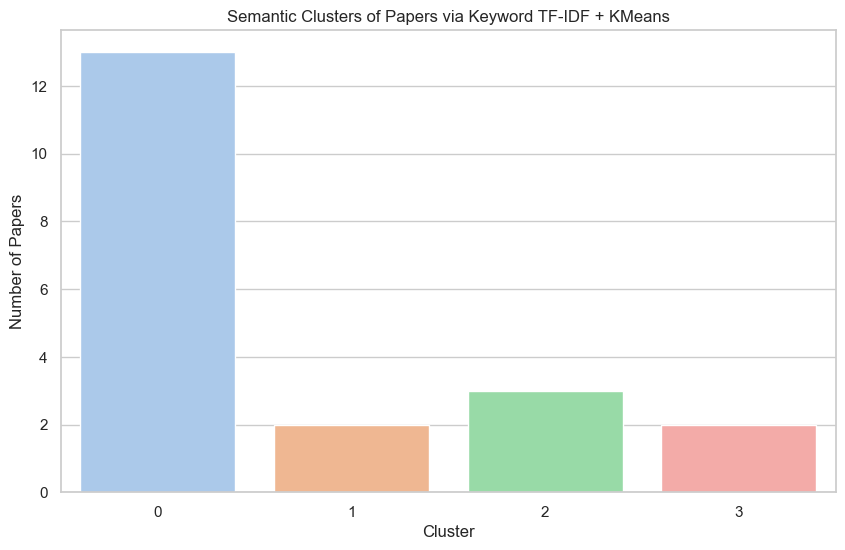

,Keyword,PageRank Score
0,twins,0.059216
1,vol,0.051338
2,dts,0.033155
3,doi,0.027663
4,ieee,0.021737
5,federated,0.019962
6,cloud,0.019294
7,service,0.018794
8,imaging,0.018742
9,consumer,0.018570


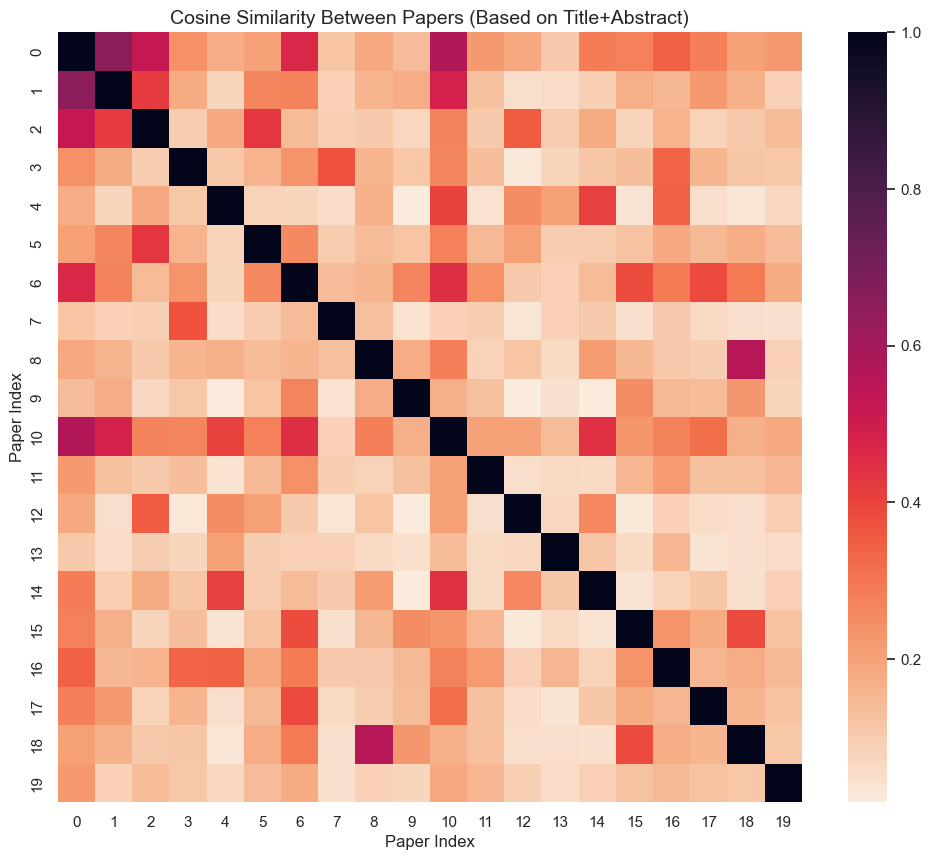

In [ ]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx


df['text'] = (df['title'].fillna('') + ' ' + df['abstract'].fillna('')).str.lower()

# Clean tokenizer
def clean_tokenizer(text):
    return re.findall(r'\b[a-z]{3,}\b', text)

# TF-IDF Matrix
vectorizer = TfidfVectorizer(
    max_df=0.8, min_df=2,
    stop_words='english',
    tokenizer=clean_tokenizer,
    max_features=500
)
X = vectorizer.fit_transform(df['text'])
features = vectorizer.get_feature_names_out()

# === 💡 Topic Modeling with LDA ===
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda_topics = lda.fit_transform(X)

# Visualize topic keywords
topic_words = {}
for topic_idx, topic in enumerate(lda.components_):
    top_features = [features[i] for i in topic.argsort()[:-8:-1]]
    topic_words[f"Topic {topic_idx+1}"] = top_features

topic_df = pd.DataFrame.from_dict(topic_words, orient='index', columns=[f"Word {i+1}" for i in range(7)])
display(topic_df)

# === 🧠 Keyword Co-occurrence + KMeans clustering ===
co_matrix = pd.DataFrame(X.toarray(), columns=features)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(co_matrix)

df['semantic_cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.countplot(x="semantic_cluster", data=df, palette="pastel")
plt.title("Semantic Clusters of Papers via Keyword TF-IDF + KMeans")
plt.xlabel("Cluster")
plt.ylabel("Number of Papers")
plt.show()

# === 🧾 Centrality via PageRank on Co-occurrence ===
G = nx.Graph()
keywords = [re.findall(r'\b[a-z]{3,}\b', row.lower()) for row in df['top_keywords'].fillna("")]
for kw_list in keywords:
    for pair in itertools.combinations(set(kw_list), 2):
        if G.has_edge(*pair):
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(*pair, weight=1)

pagerank_scores = nx.pagerank(G, weight='weight')
central_keywords = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
central_df = pd.DataFrame(central_keywords, columns=["Keyword", "PageRank Score"])
display(central_df)

# === 🔗 Cosine Similarity Heatmap ===
cos_sim = cosine_similarity(X)
plt.figure(figsize=(12, 10))
sns.heatmap(cos_sim, cmap='rocket_r')
plt.title("Cosine Similarity Between Papers (Based on Title+Abstract)", fontsize=14)
plt.xlabel("Paper Index")
plt.ylabel("Paper Index")
plt.show()